<center> <h1> Text analysis using SVD</h1> </center> 

<center> <i>Authors: Ivan Varanytsia, Mykola Yakovkin</i>  </center>


We are working on a project that involves the use of linear algebra method - SVD. We want to understand the theory and implement it in text analysis, specifically sentiment analysis, LSA, and possibly other analyses. 

**Singular value decomposition (SVD)** is a mathematical technique used to decompose a matrix into its constituent parts, which can be used for a variety of tasks, including sentiment analysis. In the context of sentiment analysis, SVD can be used to identify the most important features or topics that are relevant to a particular sentiment. By representing a text as a matrix of word frequencies or other features, SVD can help to identify the underlying structure of the text and extract the most important information for sentiment analysis.

**Sentiment analysis** is a subfield of natural language processing that involves using computational techniques to determine the sentiment expressed in a piece of text. The goal of sentiment analysis is to identify the underlying emotional tone of a text and determine whether it is positive, negative, or neutral. However, during the research, we realised that no one uses SVD for sentiment analysis of text. But we implemented it using LSA (we'll tell you more about this later)

**Latent semantic analysis** is a technique used in natural language processing to analyze and understand the relationships between words and phrases in a corpus of text. The goal of LSA is to identify the underlying semantic structure of a corpus of text and to use this information to improve various natural language processing tasks such as information retrieval, document classification, and sentiment analysis. LSA involves decomposing a matrix of word-document frequencies into a lower-rank approximation, where the resulting factors capture the underlying semantic structure of the corpus.

The problem that our project aims to solve is to develop an efficient and effective method for analyzing the relationships between words and phrases in a corpus of text, and extracting the most important features or topics that capture the underlying semantic structure of the data.

We have conducted research on similar projects and works, and found some interesting papers:
* ["Latent Semantic Analysis for Text Classification"](https://research-repository.griffith.edu.au/bitstream/handle/10072/365635/Kalinov_2012_02Thesis.pdf?sequence=1) by Deerwester (1990): This paper introduced the use of SVD for text analysis and document classification, and showed that SVD can be used to improve the accuracy of classification models by capturing the underlying semantic structure of the text. 

We also searched for various materials in our library and found some useful resources there. 
* ["Applied Text Analysis with Python"](https://zlibrary.to/pdfs/applied-text-analysis-with-python-enabling-language-aware-data-products-with-machine-learning-pdf)  by Benjamin Bengfort (2018): This book provides a practical guide to text analysis using Python programming language. The book covers various aspects of text analysis, including natural language processing (NLP) techniques, feature extraction, text classification, sentiment analysis, topic modeling, and more. 



### Possible approaches for latent semantic analysis:
* comparing two terms ("How
similar are terms i and j ?");
* comparing two documents ("How similar are documents i and
j ?");
* comparing a term and a document ("How associated are term i and document j ?").

### Explanation of LSA implementation

1. LSA constructs a term-document matrix, where each row represents a term (e.g., a word) and each column represents a document in the corpus. The matrix contains frequency or TF-IDF scores that represent the importance of each term in each document.

2. LSA applies SVD to decompose the term-document matrix into three matrices: U, S, and V. The matrix S contains the singular values, which represent the importance of each latent semantic dimension. The matrices U and V represent the left and right singular vectors, respectively, and together they form a low-dimensional representation of the original data.

3. LSA uses this reduced-dimension representation to compute the similarity between documents or to identify latent topics in the corpus.

**Pros:**

* Simplifies data: SVD reduces the complexity of the original data by decomposing it into smaller, more manageable components.
* Removes noise: SVD can filter out noise or irrelevant information from the data, resulting in a cleaner and more meaningful representation of the data.

**Cons:**

* Transformed data may be difficult to understand: SVD transforms the original data into a new space, which may be less intuitive or difficult to interpret.

### Explanation of Sentiment Analysis implementation




The algorithm uses the same basic approach as LSA, but with a specific focus on identifying the sentiment of the text.

To perform sentiment analysis using SVD, first, a term-document matrix is constructed, where each row represents a term and each column represents a document in the corpus. Each cell in the matrix contains a score that represents the sentiment of the corresponding term in the corresponding document.

Next, SVD is applied to decompose the term-document matrix into three matrices.

Finally, the reduced-dimension representation is used to compute the sentiment score for each document. This is done by computing the dot product between the document vector and the sentiment vector, where the sentiment vector is a vector of weights assigned to each latent sentiment dimension.

**Pros and Cons**
are the same as in LSA, but additionaly we have one more disadvantage of algorithm:

* An imbalance in the emotionality of texts: If the dataset contains significantly more positive or negative texts than neutral ones, the algorithm may learn to dominate one of the emotions and not be able to recognise the others. To avoid this, it is necessary to balance the dataset.

### Theoretical part
In general, we have already explained the algorithm in the previous paragraph. However, let's now go into more detail about SVD and how we use it in our algorithm.

### Singular Value Decomposition (SVD)


The singular value decomposition (SVD) is a factorization of a real or complex matrix. The general formular for it looks like:

$$ A\overline{V\tiny{i}} = \lambda{\tiny{i}} \overline{U\tiny{i}}$$
$$ {A^T}\overline{U\tiny{i}} = \lambda{\tiny{i}} \overline{V\tiny{i}}$$
where $i\neq j$ for
$$\overline{V\tiny{i}} \perp \overline{V\tiny{j}}$$
$$\overline{U\tiny{i}} \perp \overline{U\tiny{j}} $$
and
$$ |\overline{V\tiny{i}}| = |\overline{U\tiny{i}}| = 1$$ orthonormal sets of vectors.<br>

$\overline{U\tiny{i}}$ - left singular vectors.<br>
$\overline{V\tiny{i}}$ - right singular vectors.<br>

<center><b>Based on the above, we introduce two definitions</b></center>
$U = (\overline{u\tiny{1}}, \overline{u\tiny{2}}, ..., \overline{u\tiny{i}}) \rightarrow U^{-1} = U^T$ <br>
$ V = (\overline{v\tiny{1}}, \overline{v\tiny{2}}, ..., \overline{v\tiny{i}}) \rightarrow V^{-1} = V^T $<br>

**Constructing**

Imagine we have: 
$$\overline{x} = \sum_{i} {a\tiny{i}}\overline{V\tiny{i}}$$
$$\overline{y} = A\overline{x} = A\sum_{i}{a\tiny{i}}\overline{V\tiny{i}}=\sum_{i} {a\tiny{i}}A\overline{V\tiny{i}} = \sum_{i} {a\tiny{i}}\overline{V\tiny{i}} = \sum_{i} {a\tiny{i}}{\lambda\tiny{i}}\overline{U\tiny{i}}$$

Now we should understand how to transform $\sum_{i} {a\tiny{i}}\overline{V\tiny{i}}$ to get $\sum_{i} {a\tiny{i}}{\lambda\tiny{i}}\overline{U\tiny{i}}$:<br>
$$\sum_{i} {a\tiny{i}}\overline{V\tiny{i}} \rightarrow V^{-1}\sum_{i} {a\tiny{i}}\overline{V\tiny{i}}\rightarrow EV^{-1}\sum_{i}{a\tiny{i}}\overline{V\tiny{i}} \rightarrow ... $$
where $$E= \begin{bmatrix}
{\lambda_{11}} & 0 & \dots & 0 \\
0 & {\lambda_{22}} & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & {\lambda_{mn}}
\end{bmatrix} $$
$(\lambda_{11}, \lambda_{22}, \dots, \lambda_{mn})$ - eigenvalues of matrix $A$

$$... UEV^{-1}\sum_{i}{a\tiny{i}}\overline{V\tiny{i}}\rightarrow \sum_{i} {a\tiny{i}}{\lambda\tiny{i}}\overline{U\tiny{i}}$$

<b>Therefore we can derive a formula:<b> $A = UEV^T$

**Define U and V**

Imagine we have matrix $A_{n \times m}$ and we want to consider matrices $B_{n \times n} = AA^T$ and $C_{m \times m} = A^TA$<br>

* $B^T = (AA^T)^T = AA^T = B$
* $C^T = (A^TA)^T = A^TA = C$<br>

Therefore, we can state that matrices $B$ and $C$ are <i>symmetric</i>. We can decompose our matrices into eigenvalues and eigenvectors.

* $B = (AA^T)^T = V_BS_BV_B^{-1} = V_BS_BV_B^{T}$ 
* $C = (AA^T)^T = V_CS_CV_C^{-1} = V_CS_CV_C^{T}$

We know that matrices  $B$ and $C$ are <i>symmetric</i>. Therefore, their eigenvectors are orthonormal $\rightarrow V_B$ and $V_C$ -- orthogonal and inverse matrices are their transpose.

Consider our matrices in a different way:

* $B = UEV^T(UEV^T)^T = UEV^TVE^TU^T = UEE^TU^T = V_BS_BV_B^T$ 
* $C = (UEV^T)^TUEV^T = VE^TU^TUEV^T = VE^TEV^T = V_CS_CV_C^T$

From the equality above it can be concluded that $V_B = U$, $V_C = V$ and $L^TE=EE^T=S$ from $A = UEV^T$

**Calculating SVD**

A reminder that $A = UEV^T$. Consider part $EV^T$:

$$E = \begin{bmatrix}
{\lambda_{11}} & 0 & \dots & 0 \\
0 & {\lambda_{22}} & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & {\lambda_{mn}}
\end{bmatrix} $$

$$V^T = \begin{bmatrix}
V_{11} & V_{12} & \dots & V_{1n} \\
V_{21} & V_{22} & \dots & V_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
V_{n1} & V_{n2} & \dots & V_{nn}
\end{bmatrix} $$

$$ EV^T = \begin{bmatrix}
S_1V_{11} & S_1V_{12} & \dots & S_1V_{1n} \\
S_2V_{21} & S_2V_{22} & \dots & S_2V_{2n} \\
\vdots & \vdots & \vdots & \vdots \\
S_nV_{n1} & S_nV_{n2} & \dots & S_nV_{nn} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 0
\end{bmatrix} $$

Define $EV^T$ as $V'$, $A = UEV^T=UV'$.

* $U = \{\overline{u_1}, \overline{u_2}, \dots,  \overline{u_n}\}$ 
* $V' = \{\overline{v'_1}, \overline{v'_2}, \dots,  \overline{v'_n}\}^T$

Therefore, we can represent our matrix $A_{n \times m}$ $(n \leq m)$ as tensor product of $U$ and $V$. $A = UEV^T=UV' = \sum_{i=1}^n|\overline{u_i} \otimes\overline{v'_i}| = \sum_{i=1}^n{\tiny{E_i}}|\overline{u_i} \otimes\overline{v_i}|$, $|\overline{v_i}| = |\overline{u_i}| = 1$. 

**Algorithm for finding vectors**

$$A = \begin{bmatrix}
A_{11} & A_{12} & \dots & V_{1n} \\
V_{21} & V_{22} & \dots & V_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
V_{m1} & V_{m2} & \dots & V_{mn}
\end{bmatrix} $$

And we can say that $A =\overline{U_m} \otimes \overline{V_n}$: <br>
$$A = \begin{bmatrix}
U_1V_1 & U_1V_2 & \dots & U_1V_n \\
U_2V_1 & U_2V_2 & \dots & U_2V_n \\
\vdots & \vdots & \ddots & \vdots \\
U_mV_1 & U_mV_2 & \dots & U_mV_n
\end{bmatrix} $$

Take random value for ${U_0} = rand$. Now, for each specific value of matrix $A$, having a specific value of ${U_0}$, we can find ${V_0} \rightarrow V_1 = \sum_{i=1}^n a_{i1}\frac{u_i}{|u|^2}, V_2 = \sum_{i=1}^n a_{i2}\frac{u_i}{|u|^2}, \dots,  V_n = \sum_{i=1}^n a_{in}\frac{u_i}{|u|^2}$. We have such vector $u' = \{\frac{u_i}{|u|^2}\}$ for wich equation $\overline{u'} \cdot \overline{u} = \sum_i\frac{u_i^2}{|u|^2} = 1$

Now having $\overline{V_0} = \{ v_j = \sum_{i=1}^{m} a_ij \frac{u_i}{|u|^2}\}$ we can find $\overline{U_1} = \{ u_i = \sum_{j=1}^{m} a_ij \frac{v_j}{|v|^2}\}$. We continue our actions until we arrive at $A =\overline{U_k} \otimes \overline{V_k}$. This is the best approximation we've been able to achieve.

Rewrite our meaning as $\overline{U_k} \otimes \overline{V_k} = \overline{|U_k|} \overline{|V_k|}\frac{\overline{U_k}}{|U_k|}\frac{\overline{V_k}}{\overline{|V_k|}}$, where: 
* $\frac{\overline{U_k}}{|U_k|}$ - first left singular vector
* $\frac{\overline{V_k}}{\overline{|V_k|}}$ - first right singular vector
* $\overline{|U_k|} \overline{|V_k|}$ - first eigenvalue.

With this algorithm, we look for the following values.  Only for the modified matrices $A$ $A_i = A_{i-1} - \overline{U_k} \otimes \overline{V_k}$.

## Implementation pipeline

1. Started searching for the theoretical part regarding SVD and implemented our own Singular Value Decomposition algorithm.
3. Implemented Latent Semantic Analysis on a small amount of data to better understand the method's working concept.
4. Implemented sentiment analysis on text, also on a small amount of data. Saw some drawbacks in our method regarding the balance of the text's sentiment.
6. Moving on to larger datasets, specifically a dataset of tweets.
7. Edited our dataset to reduce the amount of noise in it.
8. Implemented LSA and examined the accuracy of our sentiment analysis algorithm.(Presented more detailed conclusions below.)

### Imports


In [1]:
!pip install stop_words
!pip install wordcloud

In [75]:
import re
import string
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from scipy.linalg import qr
from wordcloud import WordCloud
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Singular Value Decomposition (SVD) Implementation

In [76]:
def eigen(A, k):
    n, m = A.shape
    Q = np.random.rand(n, k)
    Q, _ = np.linalg.qr(Q)
    Q_prev = Q
    
    for _ in range(15):
        Z = A @ Q
        Q, R = np.linalg.qr(Z)
        err = np.sum((Q - Q_prev) ** 2)
        Q_prev = Q
        if err < 1e-3:
            break

    return np.diag(R), Q

In [77]:
def our_svd(A):
    n, m = A.shape
    eigenvals, eigenvecs = eigen(A.T @ A, min(n, m))
    singular_vals = np.sqrt(np.abs(eigenvals))
    singular_vals_sorted_indices = np.argsort(singular_vals)[::-1]
    singular_vals_sorted = singular_vals[singular_vals_sorted_indices]
    eigenvecs_sorted = eigenvecs[:, singular_vals_sorted_indices]
    V = eigenvecs_sorted
    
    U = A @ V / singular_vals_sorted[np.newaxis, :]
    
    for i in range(U.shape[1]):
        sign = np.sign(U[0, i] * eigenvecs_sorted[0, i])
        U[:, i] *= sign
        V[:, i] *= sign
    
    return U, singular_vals_sorted, V.T


In [78]:
print(our_svd(np.array([[1,2,3], [2,4,7],[3,7,9]])))
print(np.linalg.svd(np.array([[1,2,3], [2,4,7],[3,7,9]])))

(array([[-0.25152627, -0.08701443, -0.96392524],
       [-0.55631474, -0.80192422,  0.21761207],
       [-0.79199098,  0.59105406,  0.15327422]]), array([14.86972679,  0.94118972,  0.0714529 ]), array([[-0.25152551, -0.55630893, -0.7919945 ],
       [ 0.0870384 ,  0.80198526, -0.59096867],
       [-0.96392906,  0.21757764,  0.15329951]]))
(array([[-0.25152607, -0.08703971, -0.9639288 ],
       [-0.55631406, -0.80198103,  0.21758006],
       [-0.79199072,  0.5909742 ,  0.15329772]]), array([14.86973629,  0.94118918,  0.07145289]), array([[-0.25152607, -0.55631406, -0.79199072],
       [ 0.08703971,  0.80198103, -0.5909742 ],
       [-0.9639288 ,  0.21758006,  0.15329772]]))


In [79]:
def rSVD(A, r, q=0, p=0, k=None, random_state=None):
  ny = A.shape[1]
  P = np.random.randn(ny, r+p)

  Z = A @ P
  for k in range(q):
    Z = A @ (A.T @ Z)

  Q, R = np.linalg.qr(Z, mode="reduced")
  
  Y = Q.T @ A
  UY, S, VT = our_svd(Y)
  U = Q @ UY
  return U, S, VT

In [80]:

print(rSVD(np.array([[1,2,3], [2,4,7],[3,7,9]]), r =3))
from sklearn.utils.extmath import randomized_svd

randomized_svd(np.array([[1,2,3], [2,4,7],[3,7,9]]), 3)

(array([[ 0.25152608, -0.08703452,  0.96394635],
       [ 0.55631413, -0.80197395, -0.21739802],
       [ 0.79199069,  0.59098831, -0.15343122]]), array([14.86973604,  0.94118711,  0.07145305]), array([[ 0.25152598,  0.55631323,  0.79199133],
       [ 0.08705654,  0.80197787, -0.59097602],
       [ 0.9639273 , -0.21759385, -0.15328757]]))


C:\anac\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


(array([[ 0.25152607,  0.08703971,  0.9639288 ],
        [ 0.55631406,  0.80198103, -0.21758006],
        [ 0.79199072, -0.5909742 , -0.15329772]]),
 array([14.86973629,  0.94118918,  0.07145289]),
 array([[ 0.25152607,  0.55631406,  0.79199072],
        [-0.08703971, -0.80198103,  0.5909742 ],
        [ 0.9639288 , -0.21758006, -0.15329772]]))

In [81]:
import numpy as np
from scipy.sparse import issparse

# from sklearn.utils.extmath import randomized_svd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array, check_random_state


class OurTruncatedSVD(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2, n_iter=5, random_state=None):
        self.n_components = n_components
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y=None):
        X = self._validate_data(X, accept_sparse=['csr', 'csc', 'coo'], ensure_min_features=2)
        random_state = check_random_state(self.random_state)
        U, S, Vt = rSVD(X, r=self.n_components, q=self.n_iter, random_state=random_state)
        self.components_ = Vt.T
        self.singular_values_ = S
        return self

    def transform(self, X):
        X = self._validate_data(X, accept_sparse=['csr', 'csc', 'coo'], ensure_min_features=2)
        return X.dot(self.components_)

    def _validate_data(self, X, accept_sparse, ensure_min_features):
        X = check_array(X, accept_sparse=accept_sparse, ensure_min_features=ensure_min_features)
        if issparse(X):
            X = X.toarray()
        return X
    


In [82]:
# A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# svd = TruncatedSVD(n_components=2)

# x_transformed = svd.fit_transform(A)

# reconstructed_matrix = svd.inverse_transform()

# explained_variance = svd.explained_variance_ratio()



### LSA on small dataset



In [83]:
body = [
    "the quick brown fox", 
    "the slow brown dog",
    "the quick red dog", 
    "the lazy yellow fox"
]

In [84]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(body)

In [85]:
print(bag_of_words.todense())

[[1 0 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 1 1 0]
 [0 1 0 0 1 1 0 1 0]
 [0 0 1 1 0 0 0 1 1]]


In [86]:
svd_lsa = OurTruncatedSVD(n_components=2)
lsa = svd_lsa.fit_transform(bag_of_words)

In [87]:
print(lsa)

[[ 1.69330846  0.31291084]
 [ 1.51975492 -0.75003414]
 [ 1.51987189 -0.77540396]
 [ 1.25874029  1.44438393]]


In [88]:
topics_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topics_encoded_df["body"] = body
display(topics_encoded_df[["body", "topic_1", "topic_2"]])

body   topic_1   topic_2
0  the quick brown fox  1.693308  0.312911
1   the slow brown dog  1.519755 -0.750034
2    the quick red dog  1.519872 -0.775404
3  the lazy yellow fox  1.258740  1.444384

In [89]:
dictionary = vectorizer.get_feature_names_out()

In [90]:
encoding_matrix = pd.DataFrame(svd_lsa.components_.T, index=['topic_1', 'topic_2'], columns=dictionary).T

In [91]:
encoding_matrix["abs_topic_1"] = np.abs(encoding_matrix["topic_1"])
encoding_matrix["abs_topic_2"] = np.abs(encoding_matrix["topic_2"])
encoding_matrix.sort_values('abs_topic_1', ascending=False)

topic_1   topic_2  abs_topic_1  abs_topic_2
the     0.660298  0.063089     0.660298     0.063089
quick   0.354675 -0.142769     0.354675     0.142769
brown   0.354617 -0.130085     0.354617     0.130085
dog     0.336580 -0.459587     0.336580     0.459587
fox     0.323718  0.522676     0.323718     0.522676
red     0.168319 -0.236136     0.168319     0.236136
slow    0.168261 -0.223451     0.168261     0.223451
lazy    0.137362  0.429310     0.137362     0.429310
yellow  0.137362  0.429310     0.137362     0.429310

In [92]:
encoding_matrix.sort_values('abs_topic_2', ascending=False)

topic_1   topic_2  abs_topic_1  abs_topic_2
fox     0.323718  0.522676     0.323718     0.522676
dog     0.336580 -0.459587     0.336580     0.459587
lazy    0.137362  0.429310     0.137362     0.429310
yellow  0.137362  0.429310     0.137362     0.429310
red     0.168319 -0.236136     0.168319     0.236136
slow    0.168261 -0.223451     0.168261     0.223451
quick   0.354675 -0.142769     0.354675     0.142769
brown   0.354617 -0.130085     0.354617     0.130085
the     0.660298  0.063089     0.660298     0.063089

### Sentimental analysis on small dataset

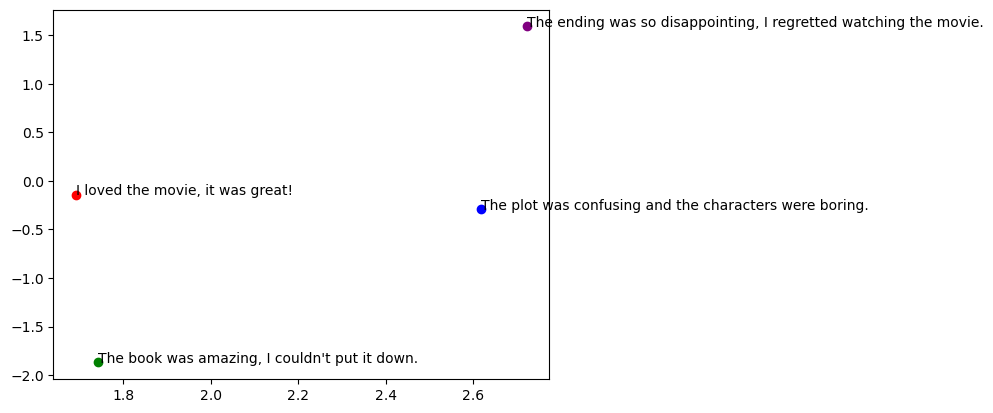

In [93]:
documents = [
    "I loved the movie, it was great!",
    "The plot was confusing and the characters were boring.",
    "The book was amazing, I couldn't put it down.",
    "The ending was so disappointing, I regretted watching the movie."
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

svd1 = OurTruncatedSVD(n_components=2)
X_svd = svd1.fit_transform(X)

colors = ['red', 'blue', 'green', 'purple']
for i, text in enumerate(documents):
    plt.scatter(X_svd[i, 0], X_svd[i, 1], color=colors[i])
    plt.annotate(text, (X_svd[i, 0], X_svd[i, 1]))

plt.show()

### Using built-in

In [96]:
tweets_df = pd.read_csv(r"C:\Users\Иван\Downloads\Telegram Desktop\tweets1.csv")

In [97]:
# function which parse data
def parse_data(input_string: str) -> list:
  input_string = input_string.replace("[", "").replace("]", "").replace(",", "").replace("'", "")
  token_list = input_string.split()
  return token_list
  
tokenized_data = tweets_df["tokenized_text"].apply(lambda x: parse_data(x)).tolist()
doc_data = [' '.join(data) for data in tokenized_data]

In [98]:
stop_words = get_stop_words('english') + ['arent', 'cant', 'couldnt', 'd', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'heres', 'hes', 'hows', 'id', 'ill', 'im', 'isnt', 'ive', 'lets', 'll', 'm', 'mustnt', 'nt', 're', 's', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'thats', 'theres', 'theyd', 'theyll', 'theyre', 'theyve', 've', 'wasnt', 'wed', 'well', 'werent', 'weve', 'whats', 'whens', 'wheres', 'whos', 'whys', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve']
tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words=stop_words, 
                        tokenizer=parse_data, 
                        max_df=0.2,
                        min_df=0.02,
                        token_pattern=None
                       )
tfidf_train_sparse = tfidf.fit_transform(doc_data)

tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), columns=tfidf.get_feature_names_out())

In [101]:
lsa_obj = TruncatedSVD(n_components=20, n_iter=10, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T

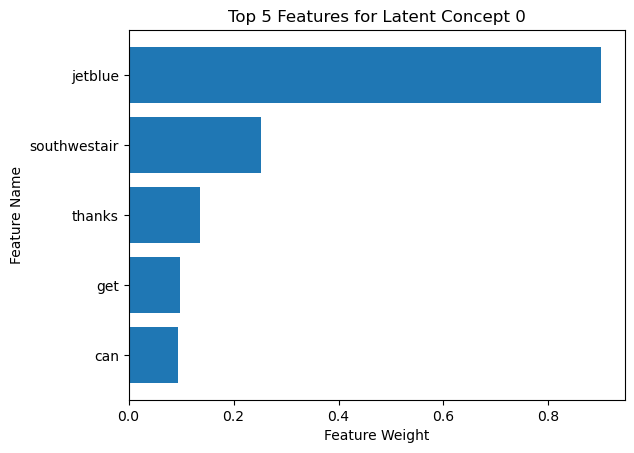

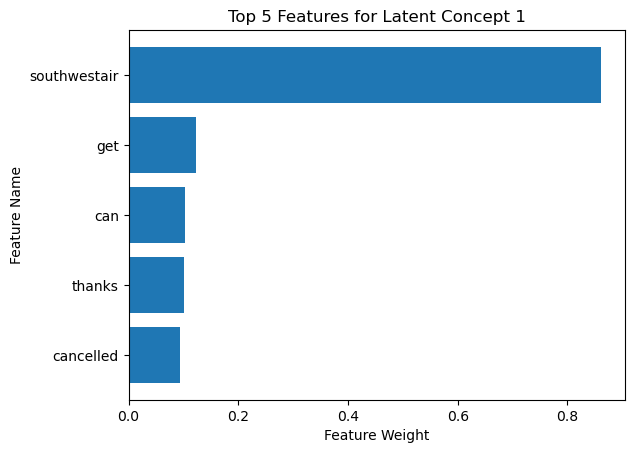

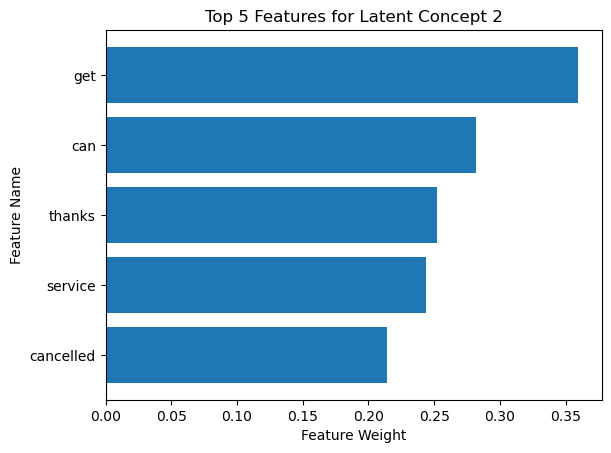

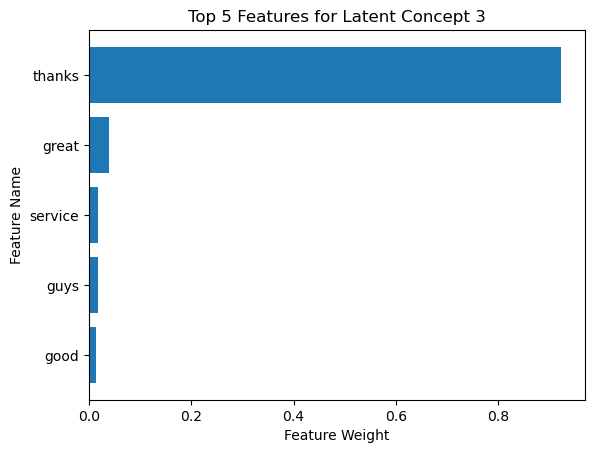

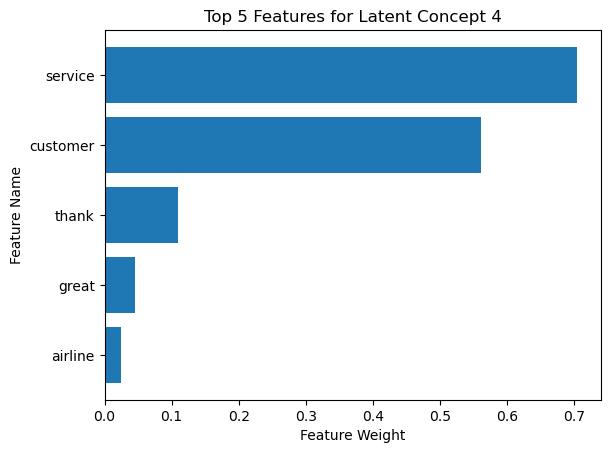

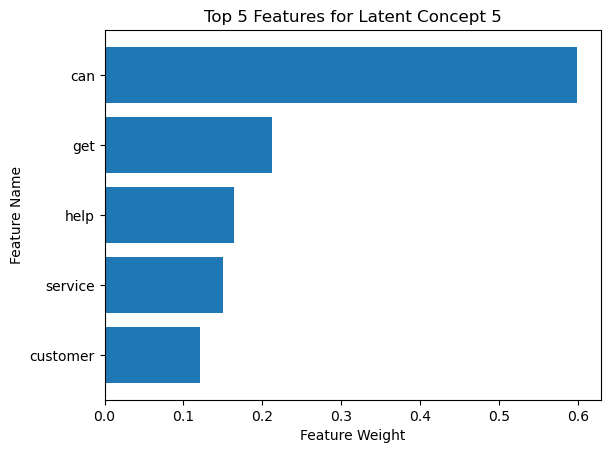

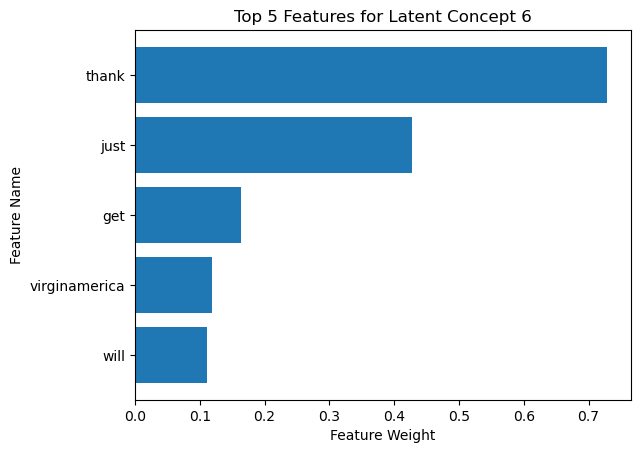

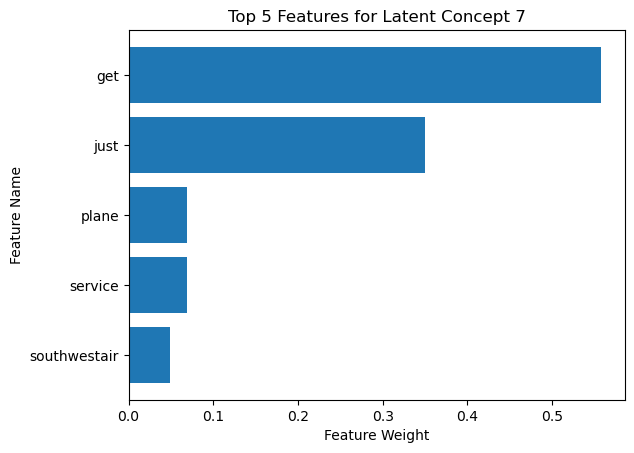

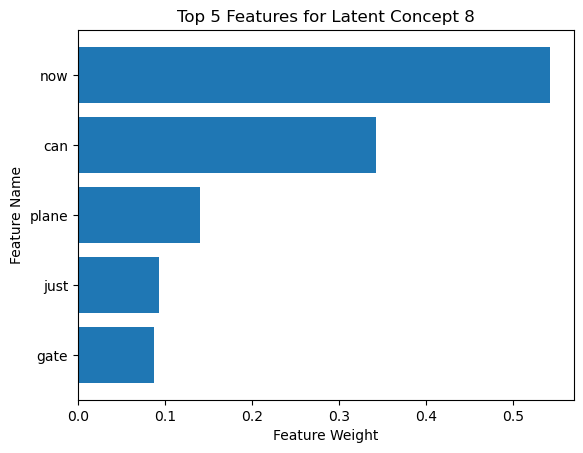

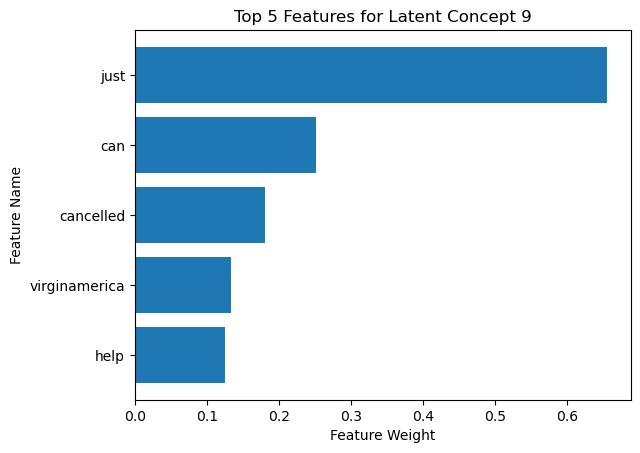

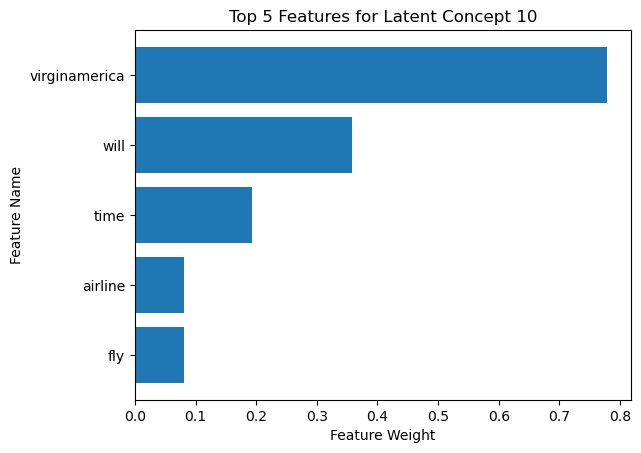

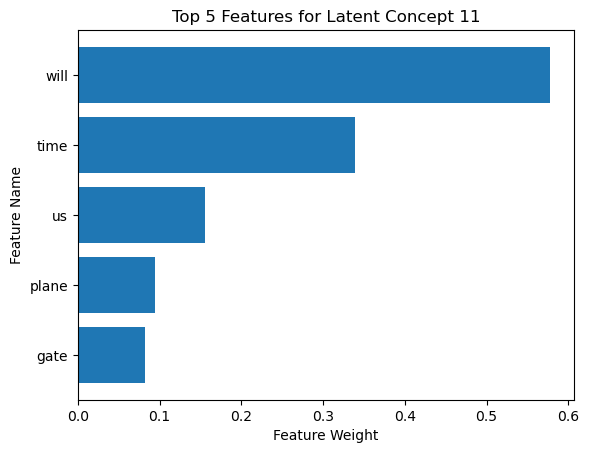

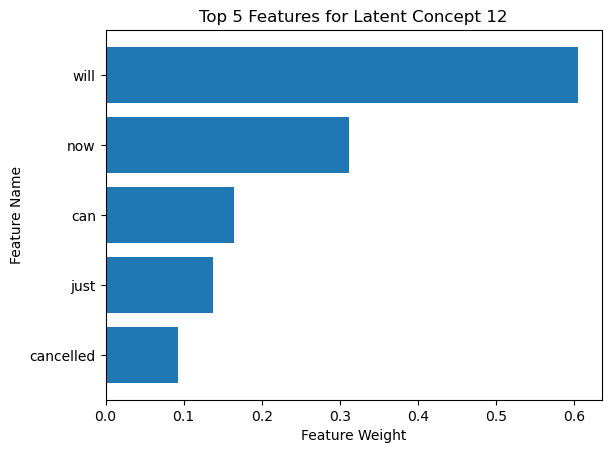

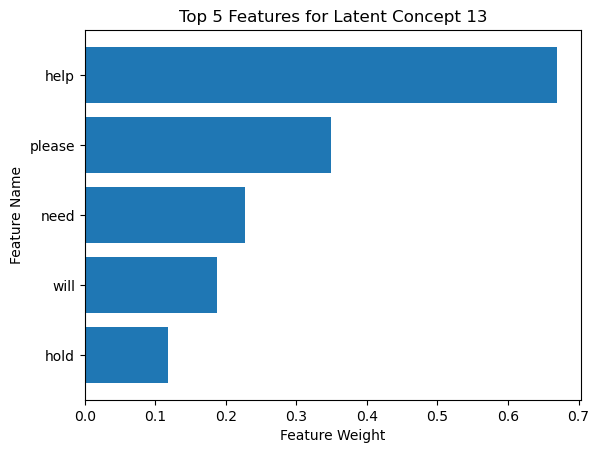

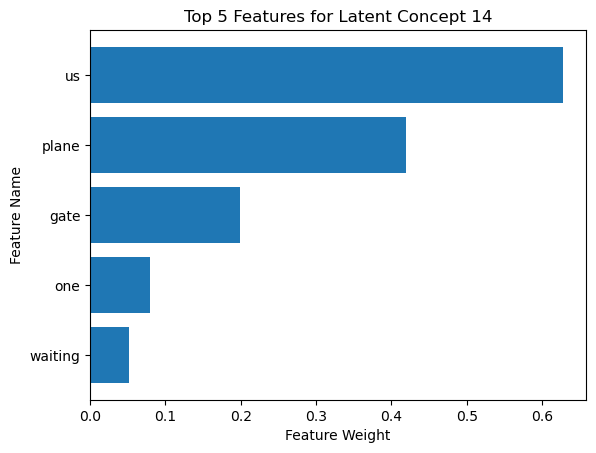

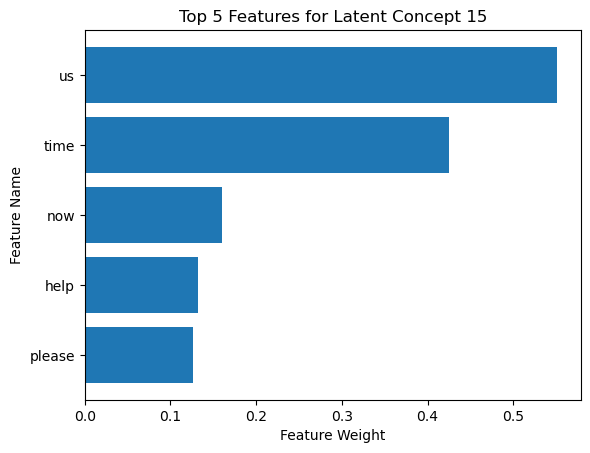

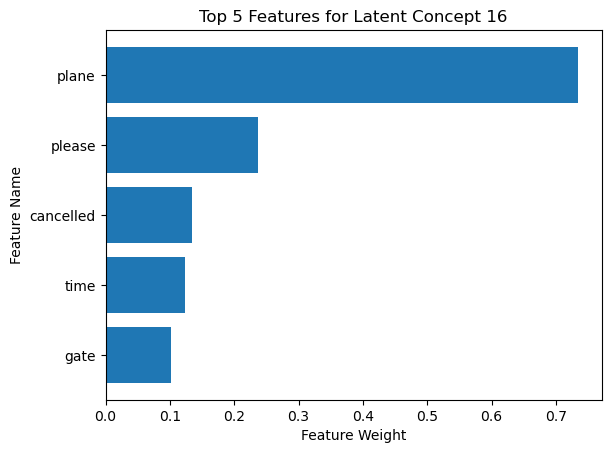

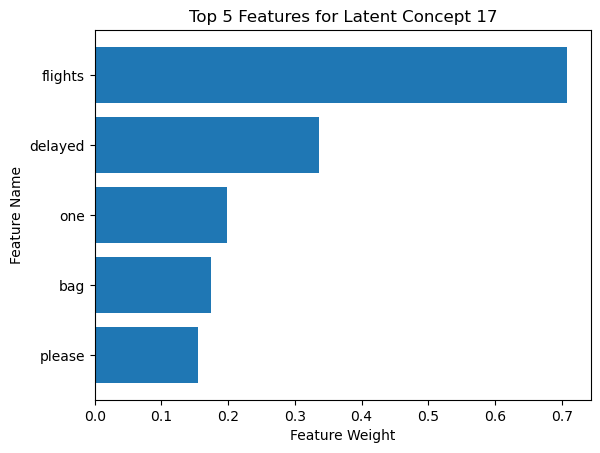

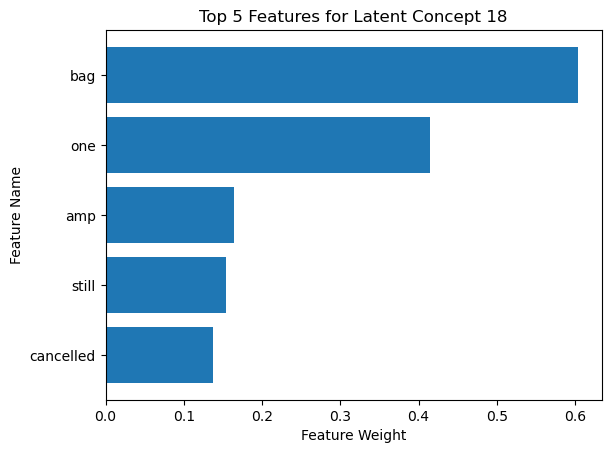

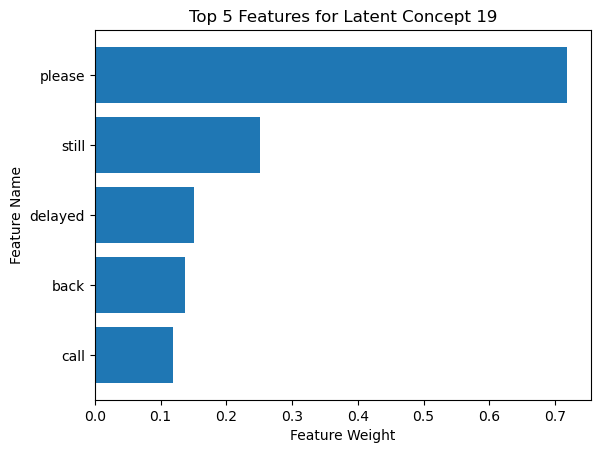

In [102]:
num_features = 5
for i in range(V_T.shape[1]):
    plt.barh(tfidf_train_df.columns[np.argsort(V_T[:, i])[-num_features:]], 
             V_T[np.argsort(V_T[:, i])[-num_features:], i])
    plt.title(f'Top {num_features} Features for Latent Concept {i}')
    plt.xlabel('Feature Weight')
    plt.ylabel('Feature Name')
    plt.show()

In [103]:
X_lsa = lsa_obj.fit_transform(tfidf_train_df)

y = tweets_df['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_lsa, y, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
accuracy_built = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_built)

Accuracy: 0.6994535519125683


### Implementation on bigger dataset

#### Dataset import

In [94]:
tweets_df = pd.read_csv(r"C:\Users\Иван\Downloads\Telegram Desktop\tweets1.csv")

#### Tokenized data

In [95]:
# function which parse data
def parse_data(input_string: str) -> list:
  input_string = input_string.replace("[", "").replace("]", "").replace(",", "").replace("'", "")
  token_list = input_string.split()
  return token_list
  
tokenized_data = tweets_df["tokenized_text"].apply(lambda x: parse_data(x)).tolist()
doc_data = [' '.join(data) for data in tokenized_data]

#### Vectorized data

In [55]:
stop_words = get_stop_words('english') + ['arent', 'cant', 'couldnt', 'd', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'heres', 'hes', 'hows', 'id', 'ill', 'im', 'isnt', 'ive', 'lets', 'll', 'm', 'mustnt', 'nt', 're', 's', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'thats', 'theres', 'theyd', 'theyll', 'theyre', 'theyve', 've', 'wasnt', 'wed', 'well', 'werent', 'weve', 'whats', 'whens', 'wheres', 'whos', 'whys', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve']
tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words=stop_words, 
                        tokenizer=parse_data, 
                        max_df=0.2,
                        min_df=0.02,
                        token_pattern=None
                       )
tfidf_train_sparse = tfidf.fit_transform(doc_data)

tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), columns=tfidf.get_feature_names_out())

#### LSA

In [56]:
lsa_obj = OurTruncatedSVD(n_components=20, n_iter=10, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T

#### Display top 5 features for each topic

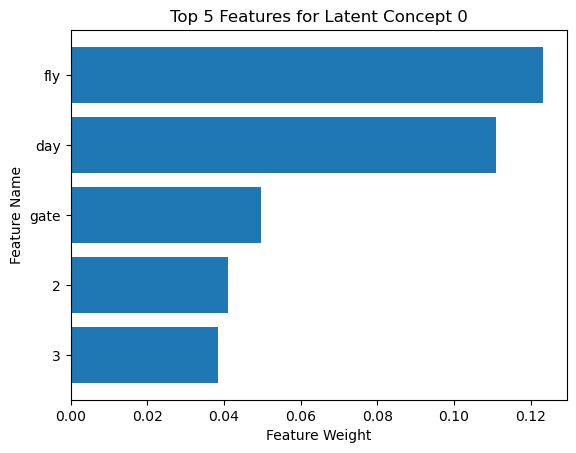

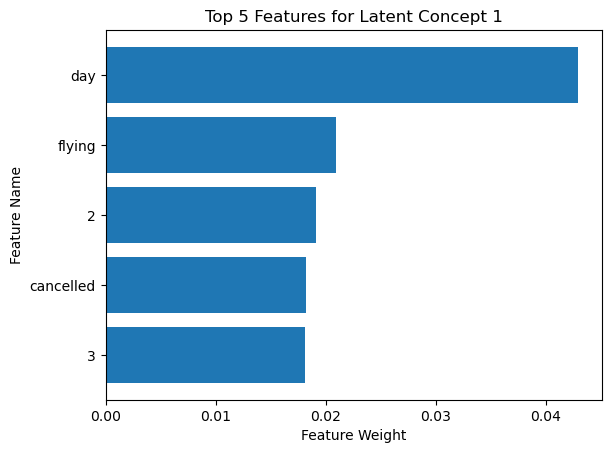

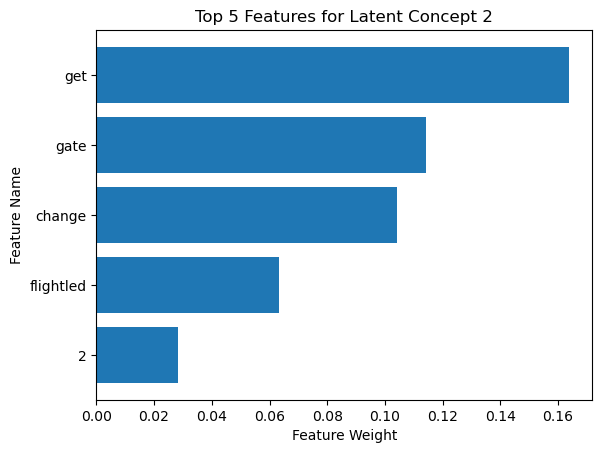

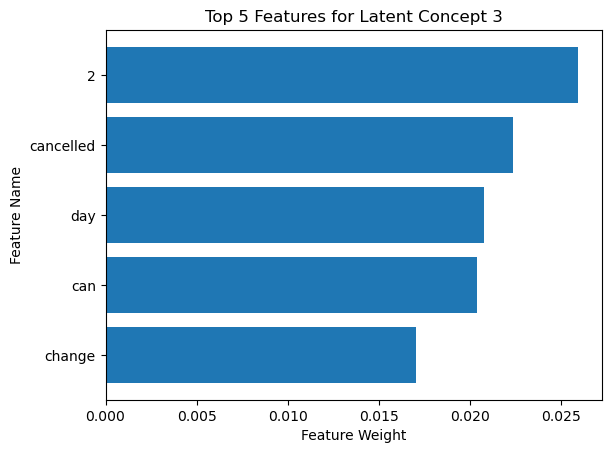

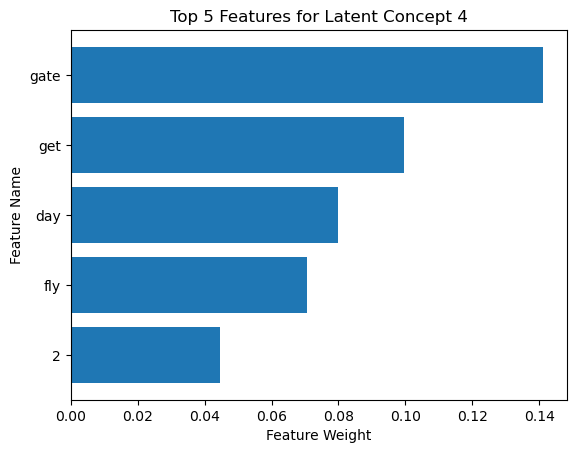

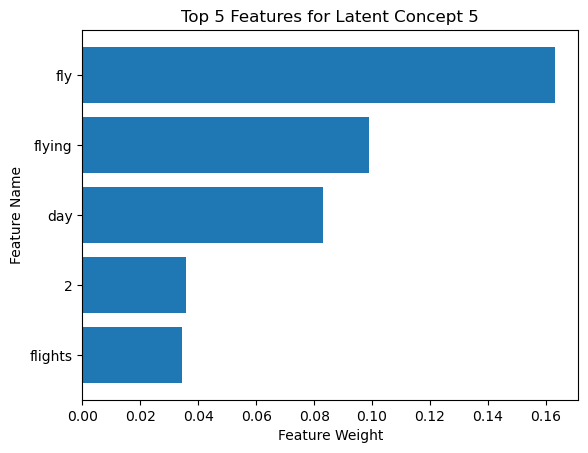

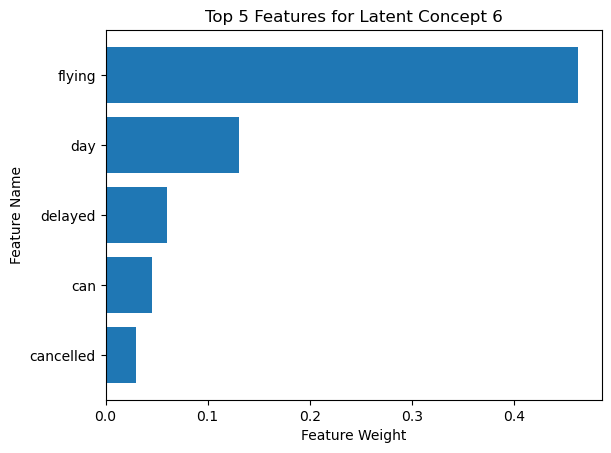

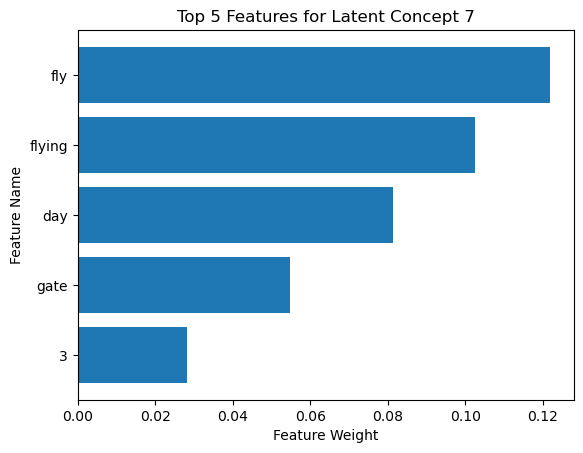

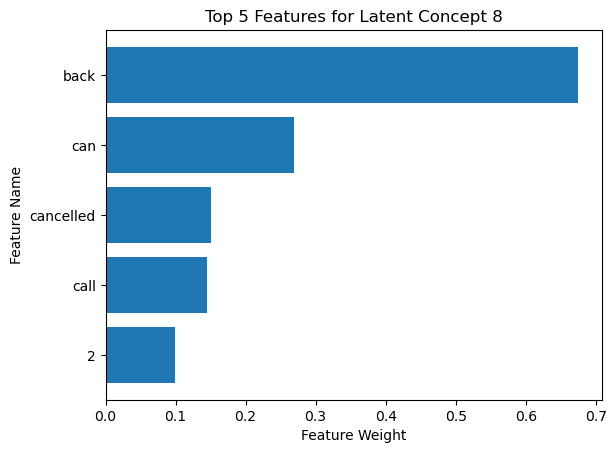

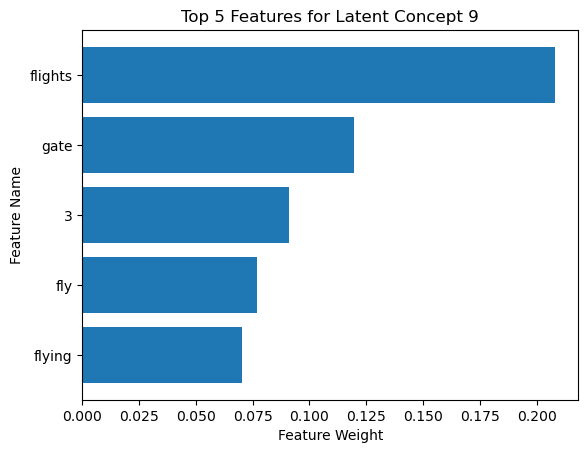

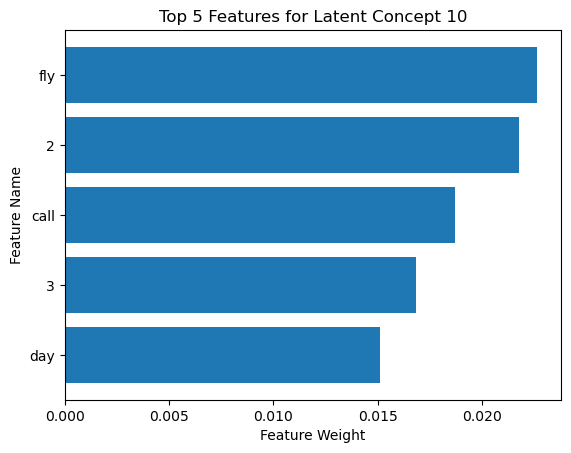

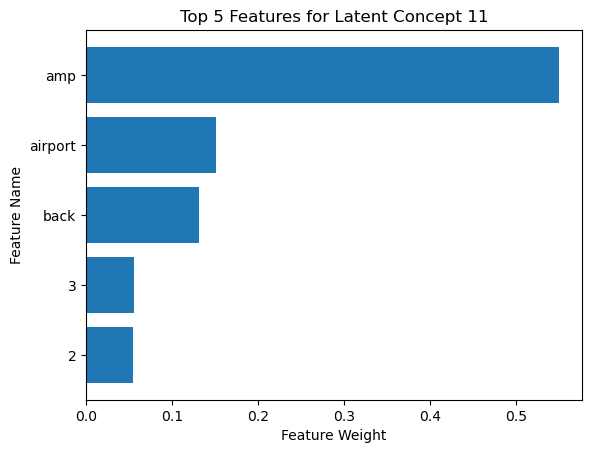

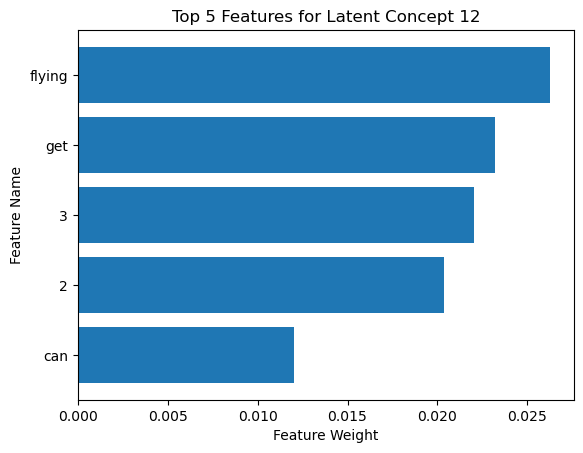

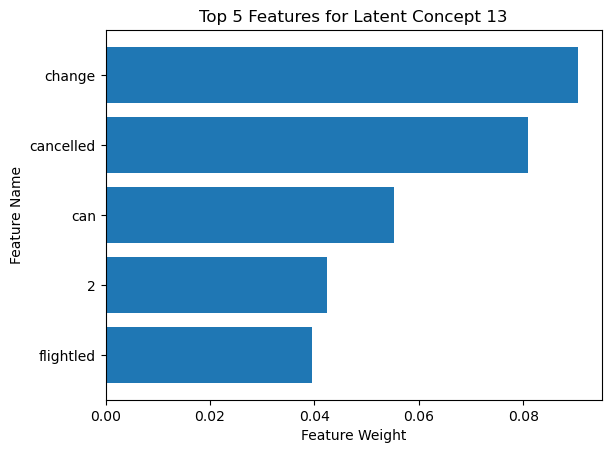

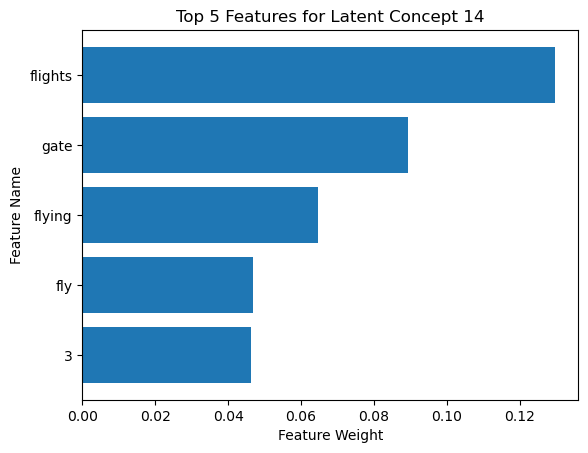

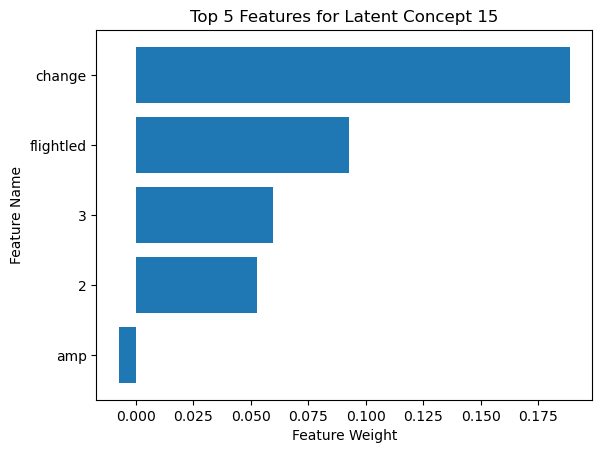

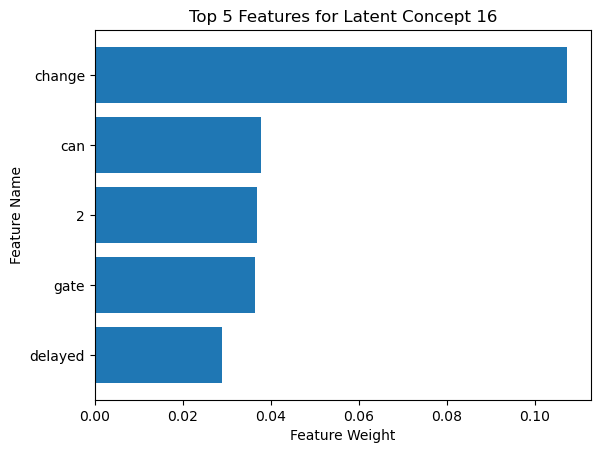

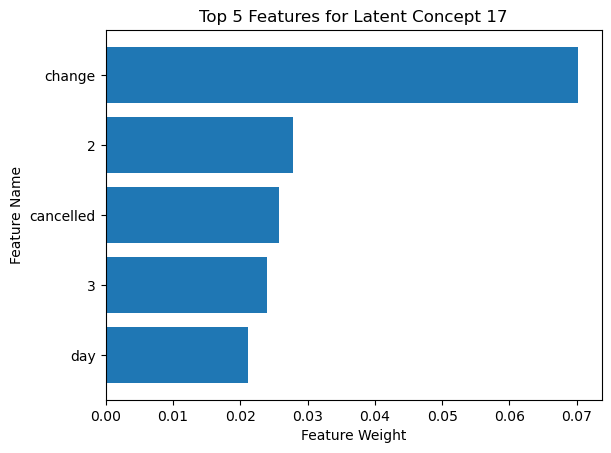

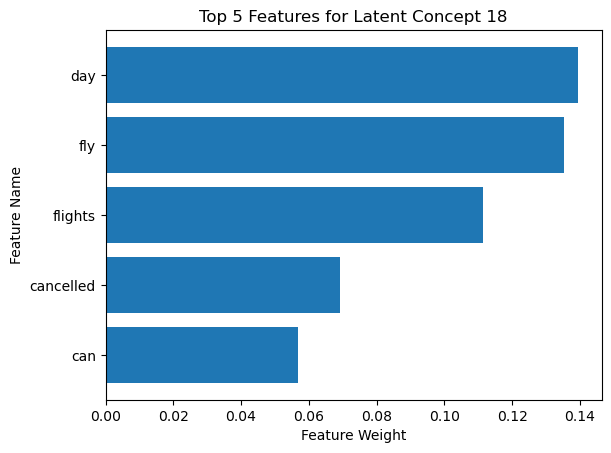

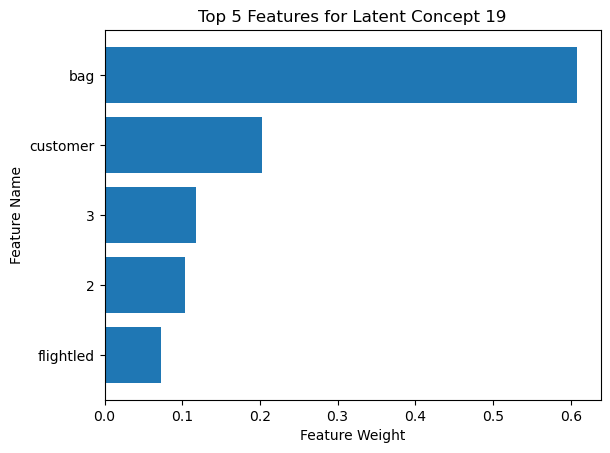

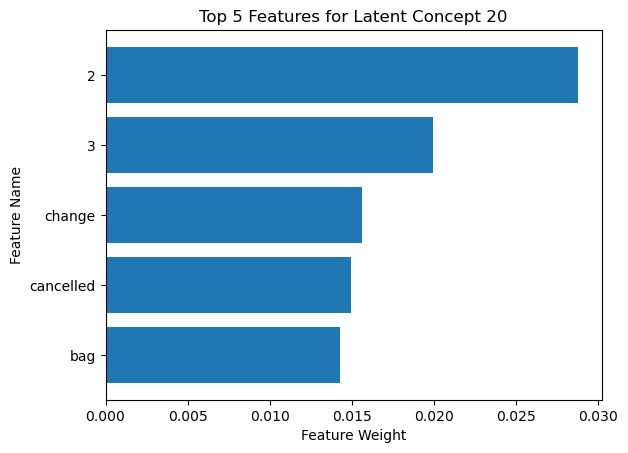

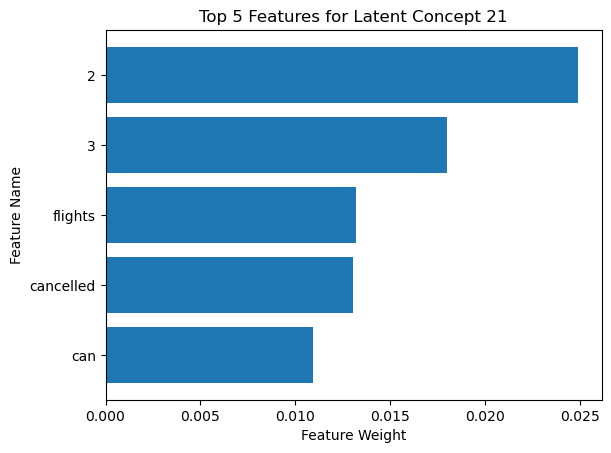

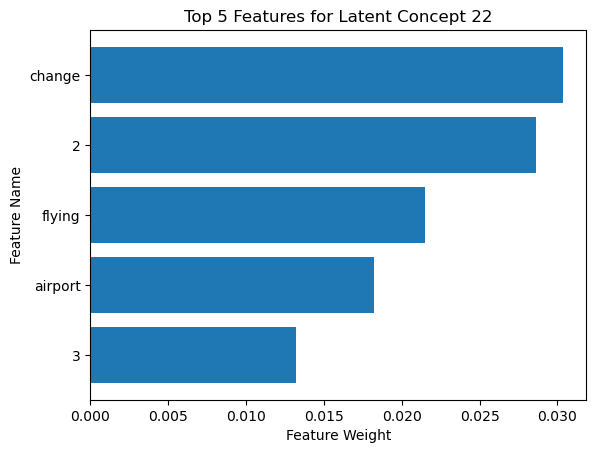

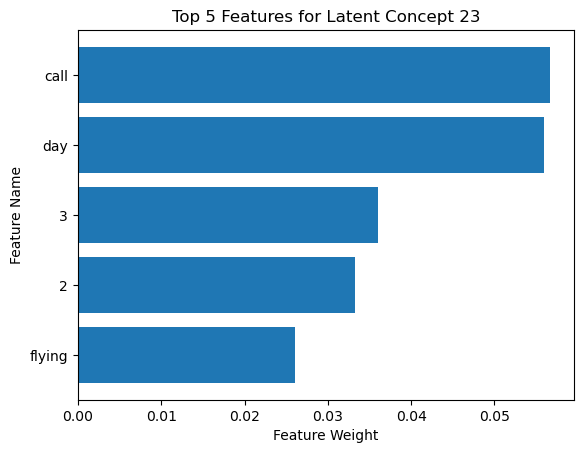

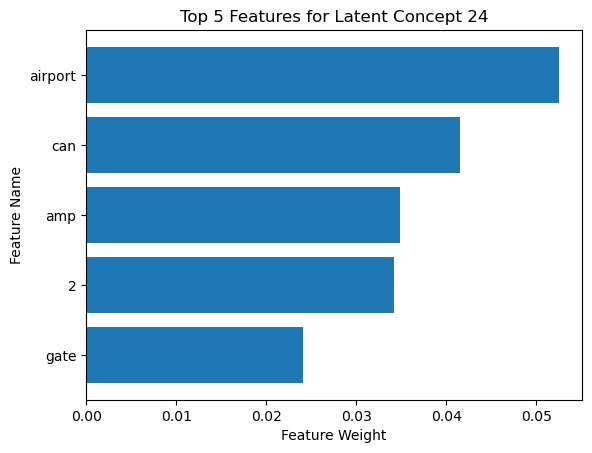

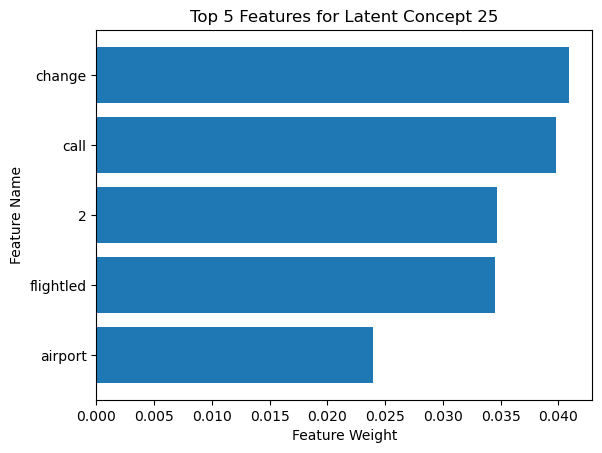

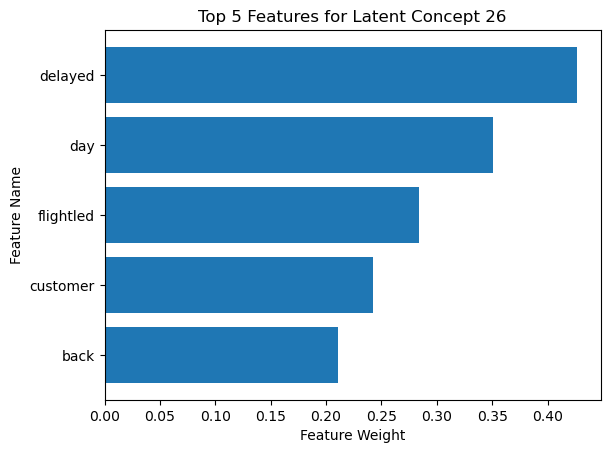

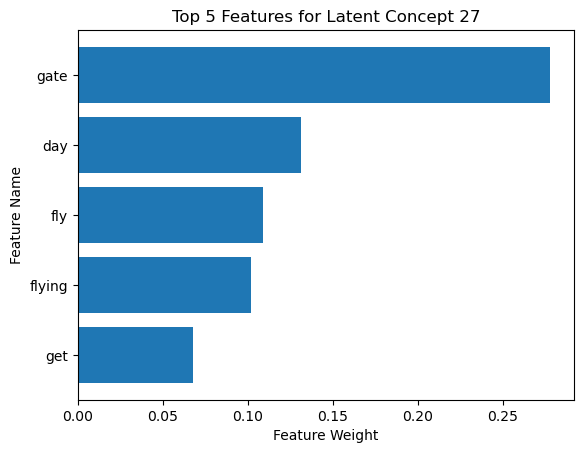

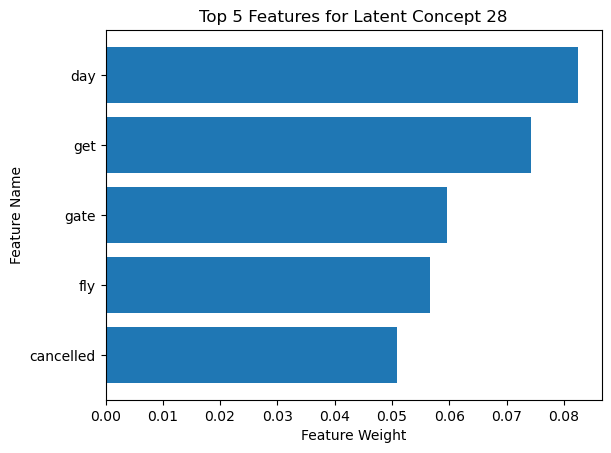

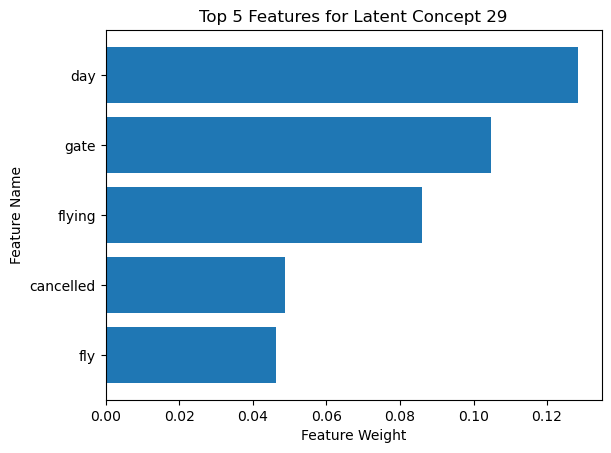

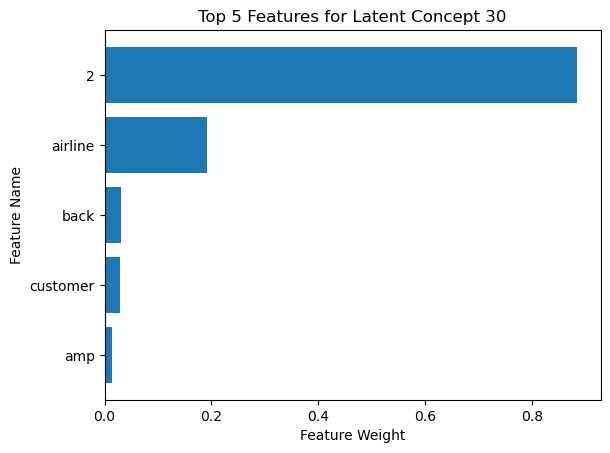

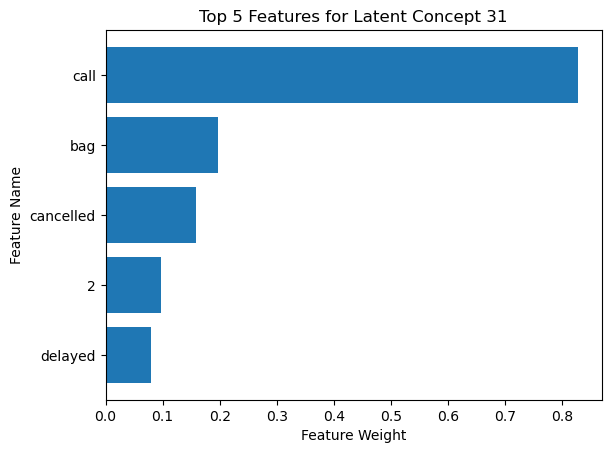

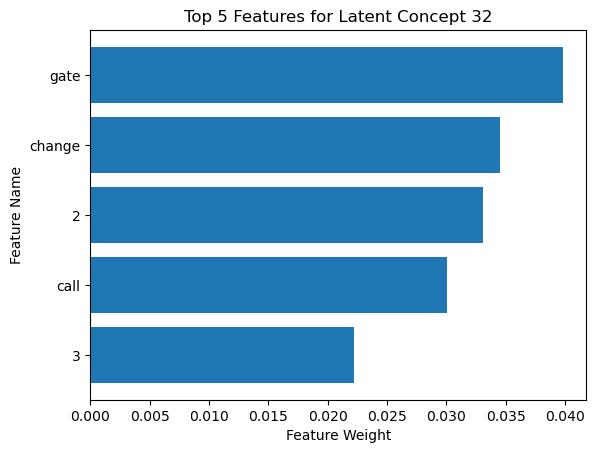

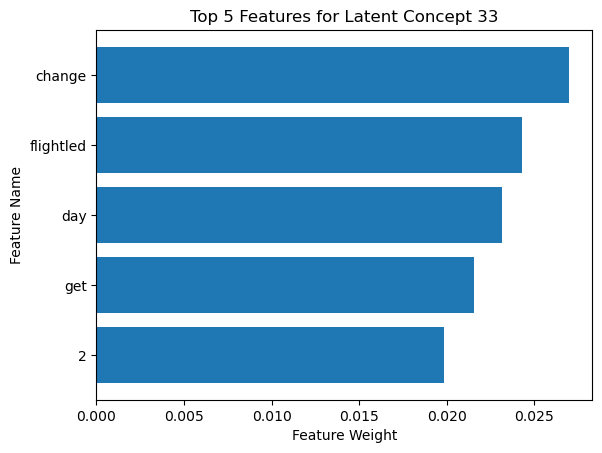

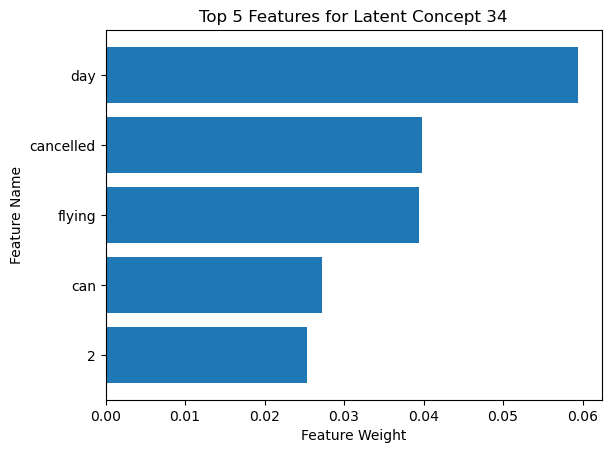

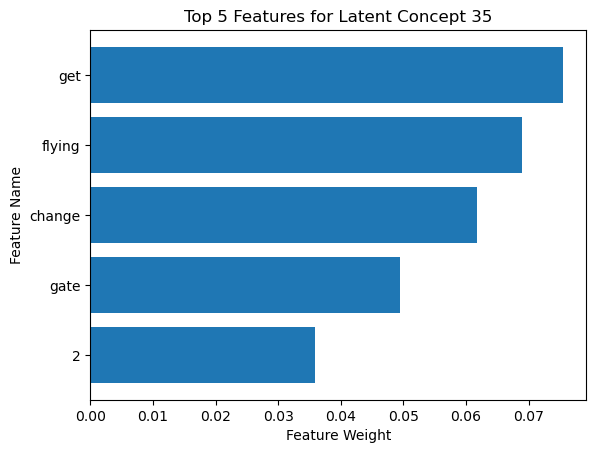

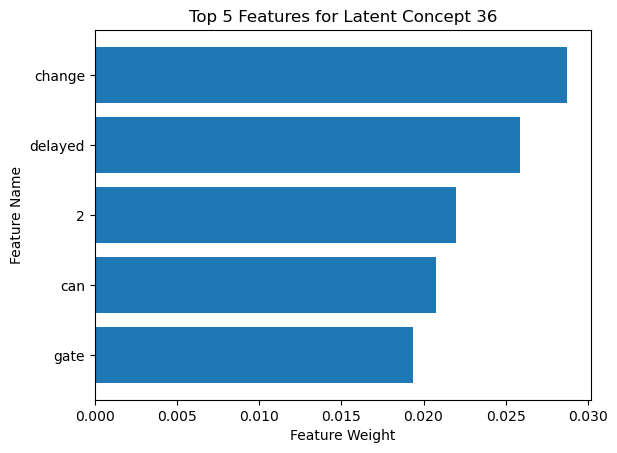

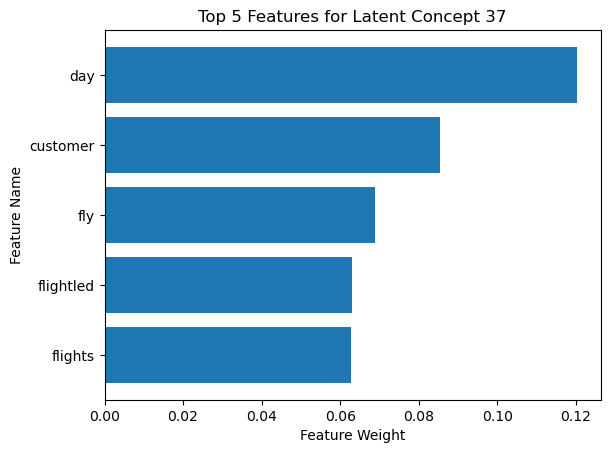

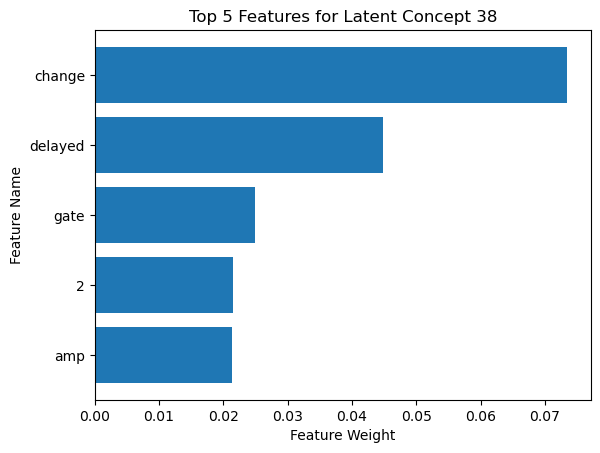

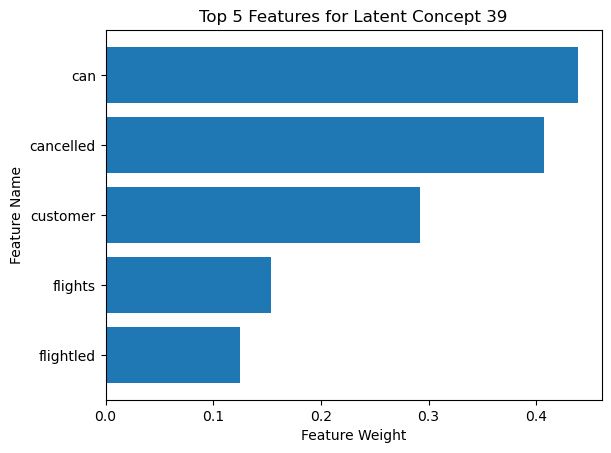

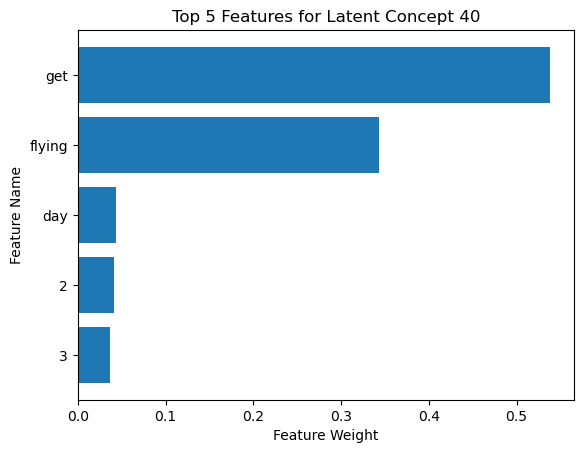

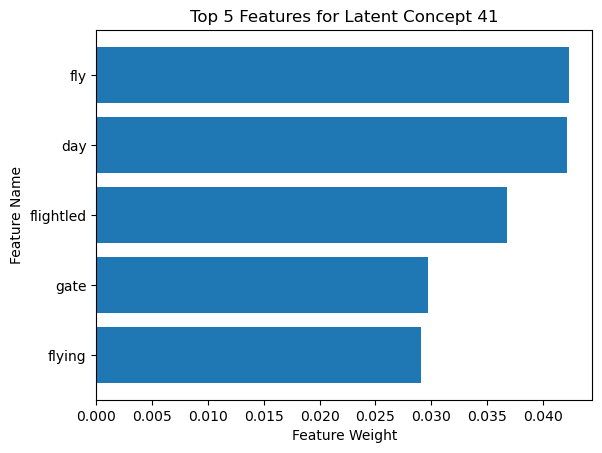

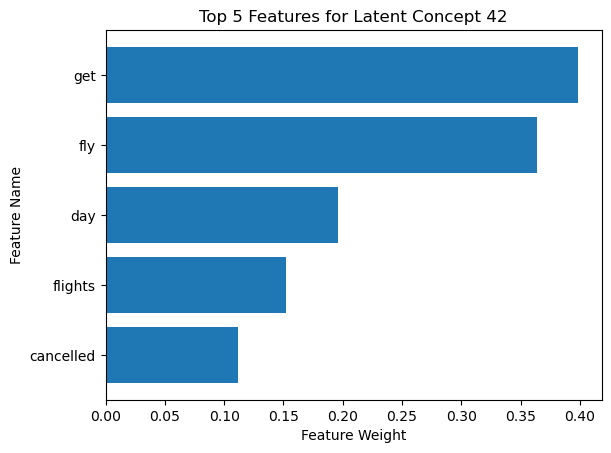

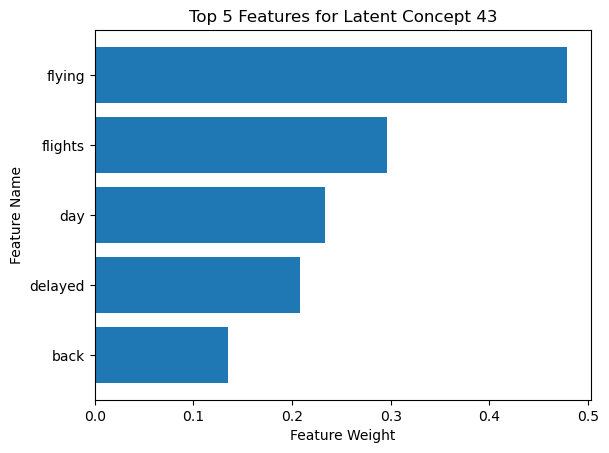

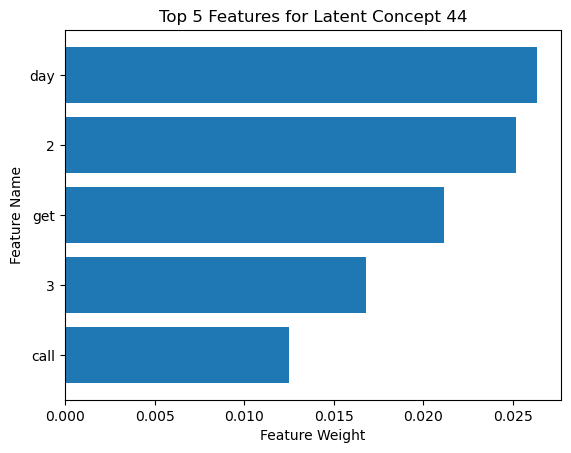

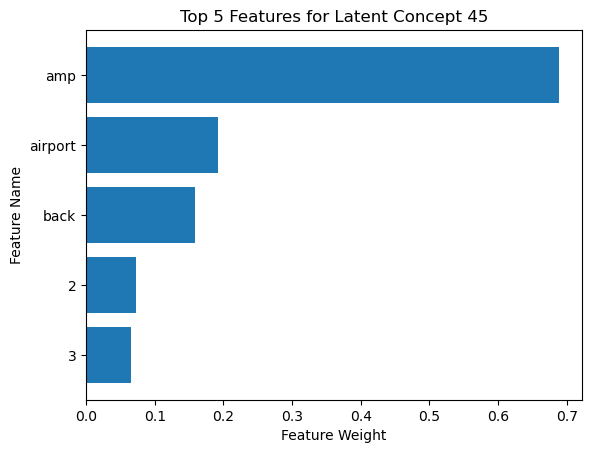

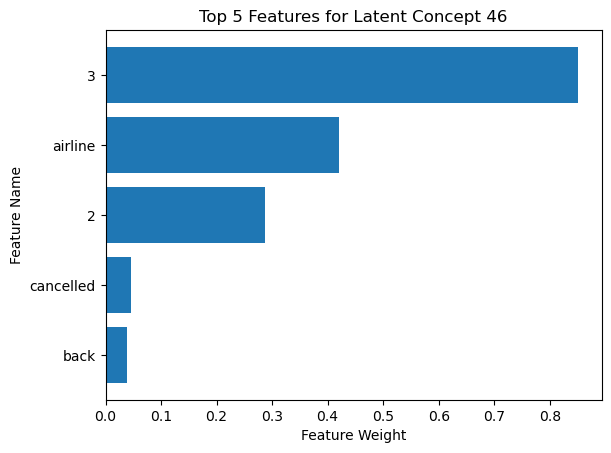

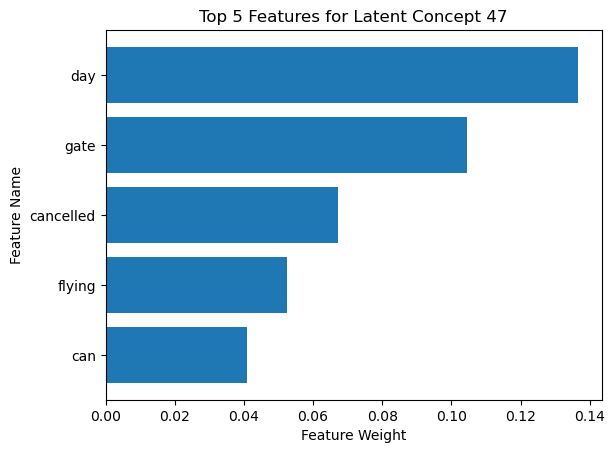

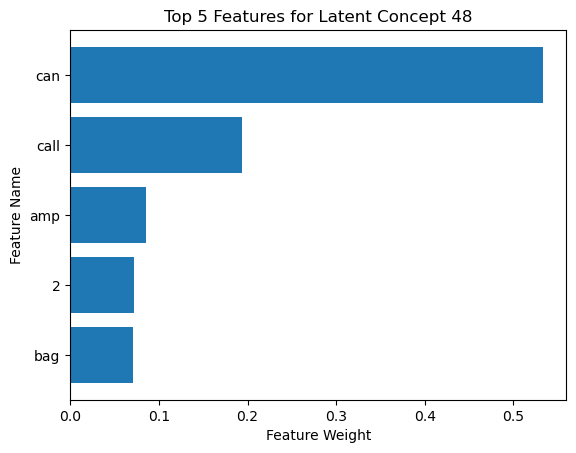

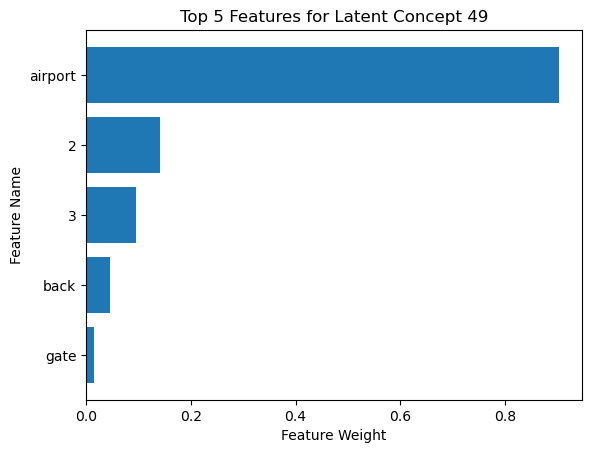

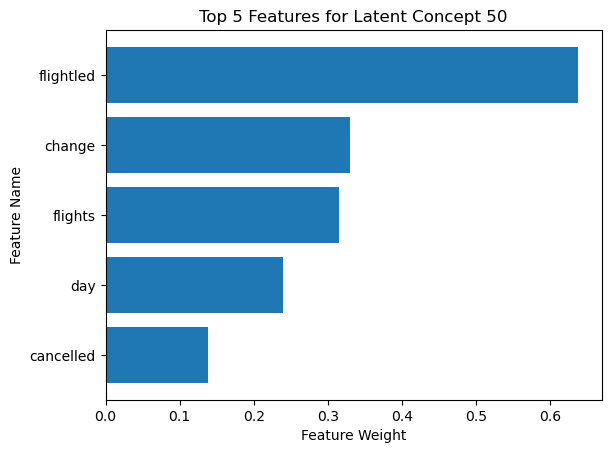

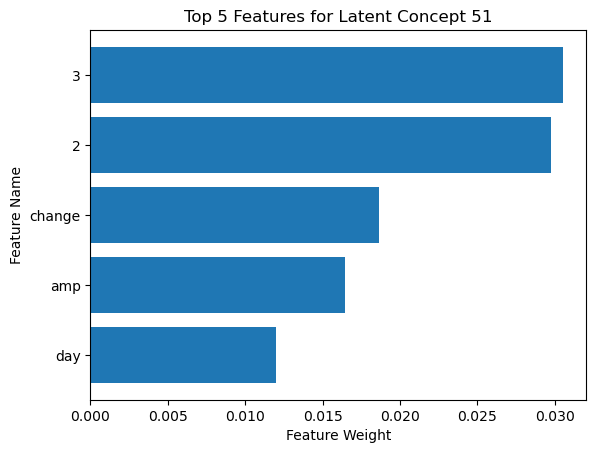

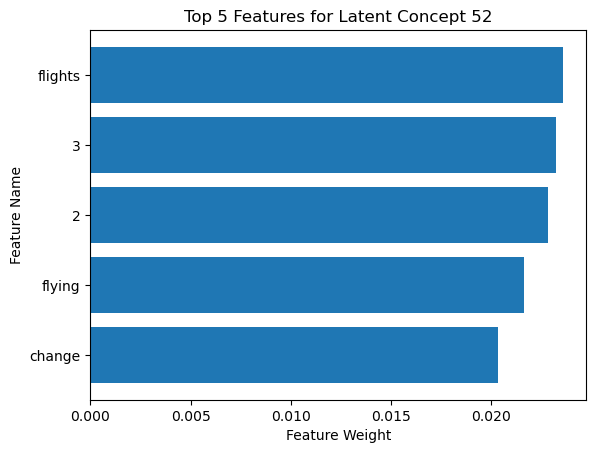

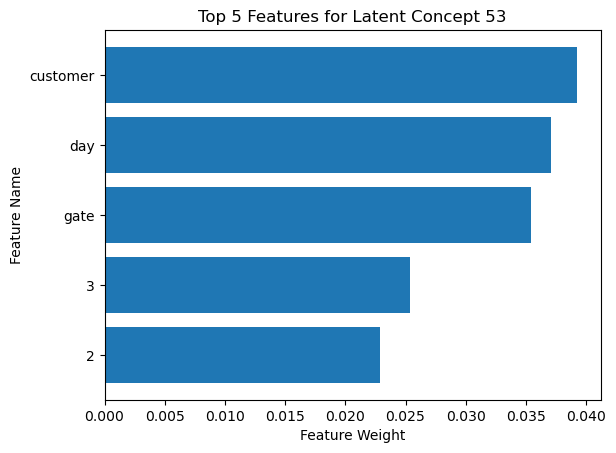

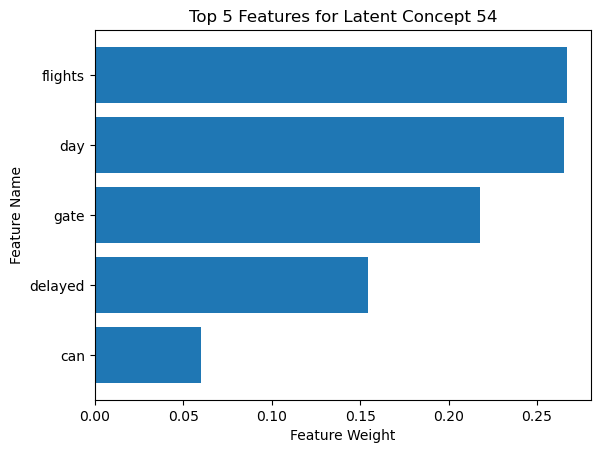

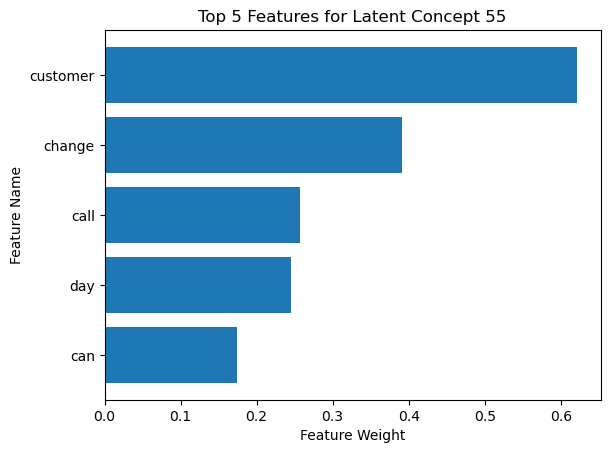

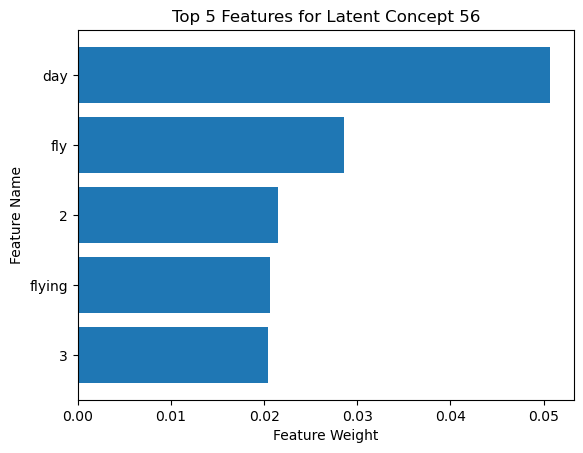

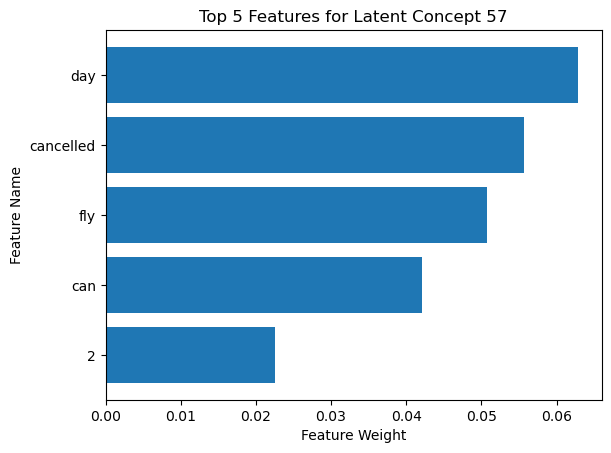

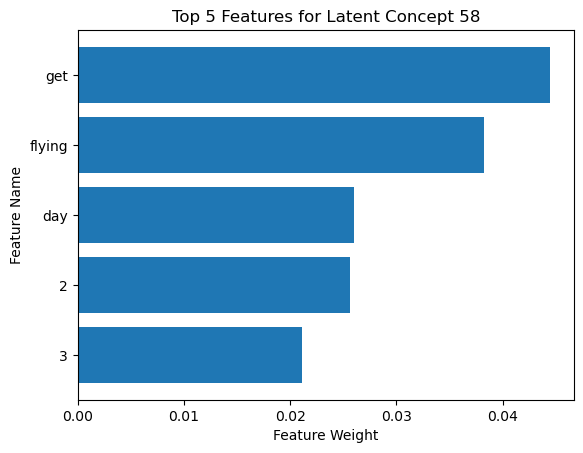

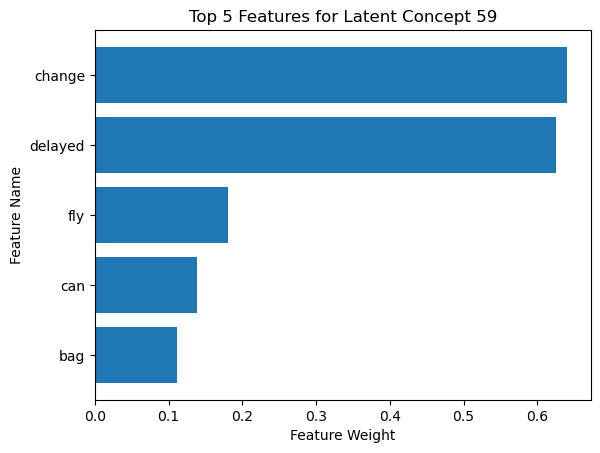

In [57]:
num_features = 5
for i in range(V_T.shape[1]):
    plt.barh(tfidf_train_df.columns[np.argsort(V_T[:, i])[-num_features:]], 
             V_T[np.argsort(V_T[:, i])[-num_features:], i])
    plt.title(f'Top {num_features} Features for Latent Concept {i}')
    plt.xlabel('Feature Weight')
    plt.ylabel('Feature Name')
    plt.show()

#### Display top words in negative, neutral and positive

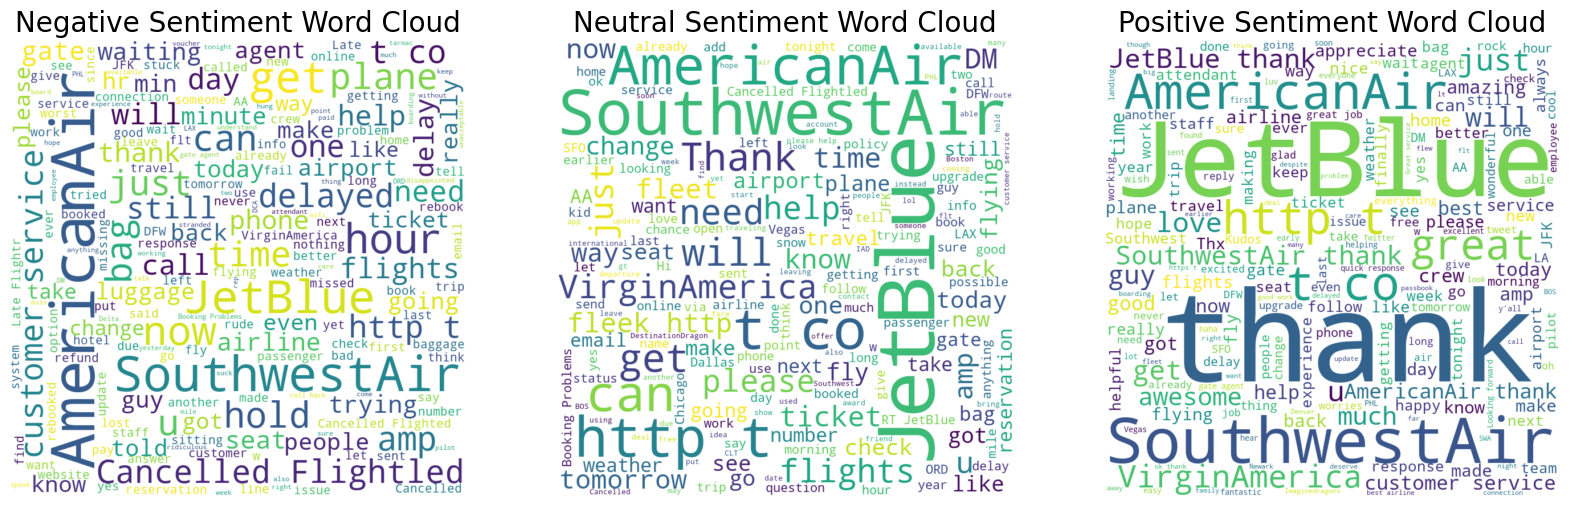

In [58]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 
    return wordcloud

stopwords = stop_words + ['flight', 'USAirways', 'united']
neg_text = ' '.join(tweets_df[tweets_df['airline_sentiment'] == 'negative']['text'])
neg_wordcloud = generate_wordcloud(neg_text)

neu_text = ' '.join(tweets_df[tweets_df['airline_sentiment'] == 'neutral']['text'])
neu_wordcloud = generate_wordcloud(neu_text)

pos_text = ' '.join(tweets_df[tweets_df['airline_sentiment'] == 'positive']['text'])
pos_wordcloud = generate_wordcloud(pos_text)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(neg_wordcloud, interpolation='bilinear')
axs[0].set_title('Negative Sentiment Word Cloud', fontsize=20)
axs[0].axis('off')

axs[1].imshow(neu_wordcloud, interpolation='bilinear')
axs[1].set_title('Neutral Sentiment Word Cloud', fontsize=20)
axs[1].axis('off')

axs[2].imshow(pos_wordcloud, interpolation='bilinear')
axs[2].set_title('Positive Sentiment Word Cloud', fontsize=20)
axs[2].axis('off')

plt.show()

Note that due to the low accuracy of our model, using SVD for sentiment analysis may not be very appropriate. Furthermore, it is important to keep in mind that words that appear frequently across multiple texts have less influence on our semantic analysis.

#### Calculate accuracy

In [59]:
X_lsa = lsa_obj.fit_transform(tfidf_train_df)

y = tweets_df['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_lsa, y, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
accuracy_multi = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_multi)

Accuracy: 0.6994535519125683


From this study we can conclude that the use of SVD for text tone analysis may not be entirely correct due to the low accuracy of the accuracy. It should be taken into account that SVD, although it is a powerful tool for data dimensionality reduction, cannot always fully cover all the subtleties of the analyzed language. Therefore, other methods, such as neural network algorithms, should be applied in order to obtain a more accurate estimation of text tonality.

In [60]:
tweets_binary_df = pd.read_csv(r"C:\Users\Иван\Downloads\Telegram Desktop\tweets1_binary.csv")

In [61]:
tweets_binary_df = tweets_binary_df[tweets_binary_df['airline_sentiment'] != 'neutral']

In [62]:
# function which parse data
def parse_data(input_string: str) -> list:
  input_string = input_string.replace("[", "").replace("]", "").replace(",", "").replace("'", "")
  token_list = input_string.split()
  return token_list
  
tokenized_data_binary = tweets_binary_df["tokenized_text"].apply(lambda x: parse_data(x)).tolist()
doc_data_binary = [' '.join(data) for data in tokenized_data_binary]

In [63]:
stop_words = get_stop_words('english') + ['arent', 'cant', 'couldnt', 'd', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'heres', 'hes', 'hows', 'id', 'ill', 'im', 'isnt', 'ive', 'lets', 'll', 'm', 'mustnt', 'nt', 're', 's', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'thats', 'theres', 'theyd', 'theyll', 'theyre', 'theyve', 've', 'wasnt', 'wed', 'well', 'werent', 'weve', 'whats', 'whens', 'wheres', 'whos', 'whys', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve']
tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words=stop_words, 
                        tokenizer=parse_data, 
                        max_df=0.2,
                        min_df=0.02,
                        token_pattern=None
                       )
tfidf_train_sparse = tfidf.fit_transform(doc_data_binary)

tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), columns=tfidf.get_feature_names_out())

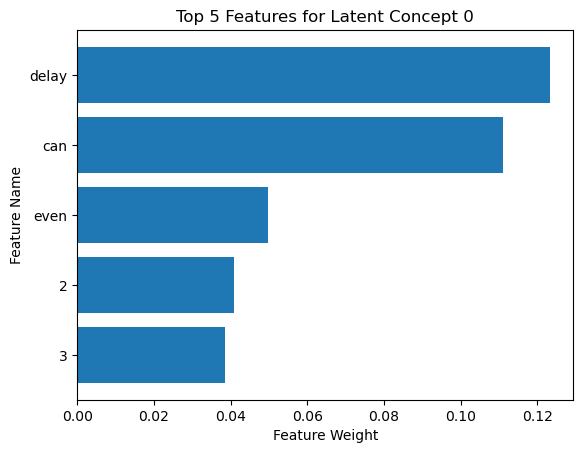

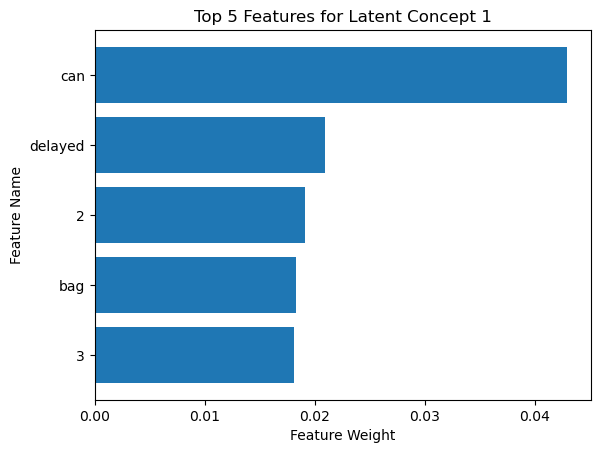

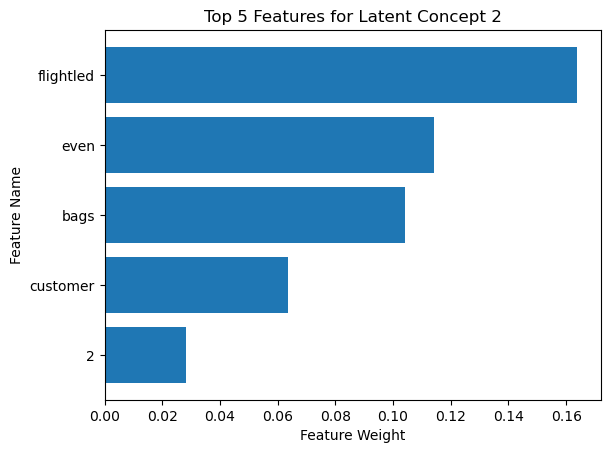

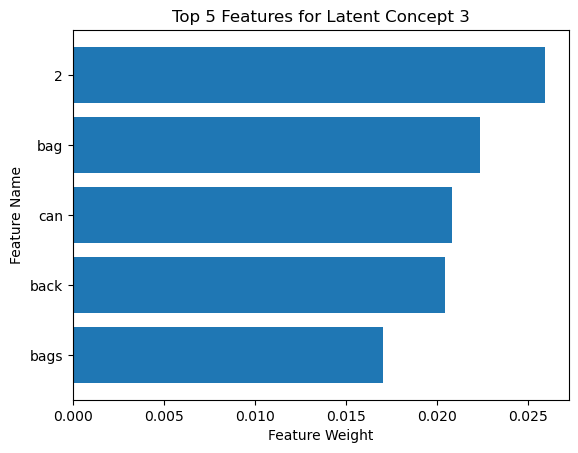

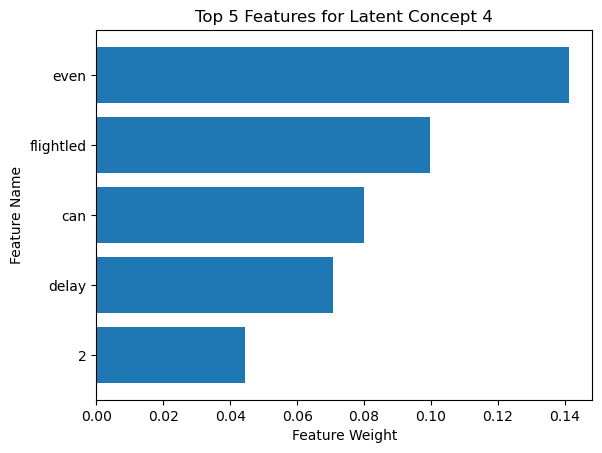

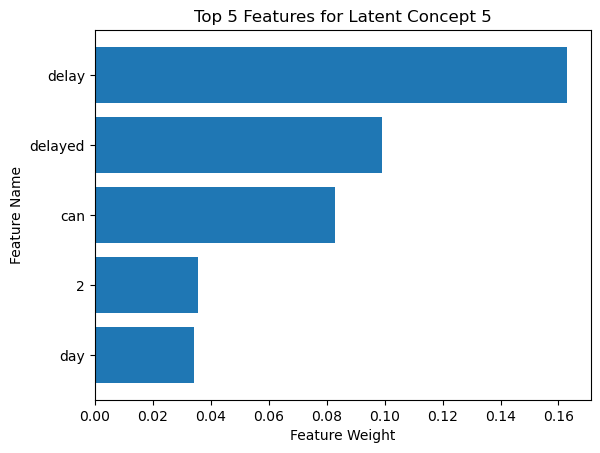

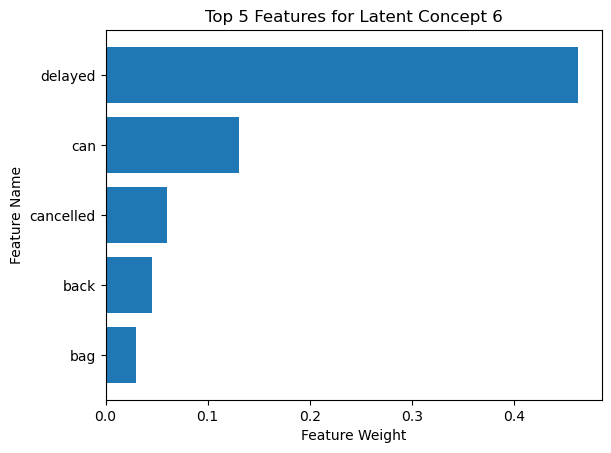

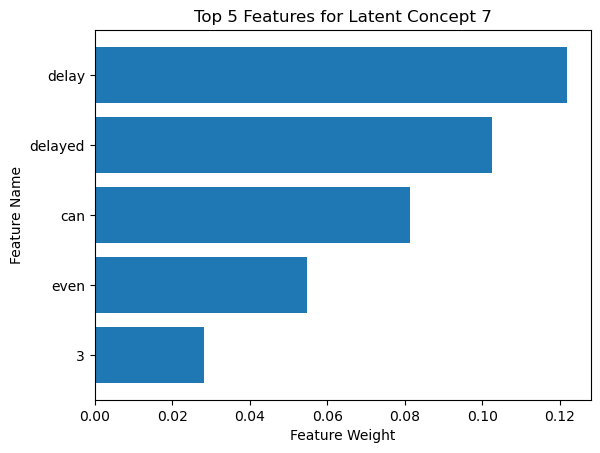

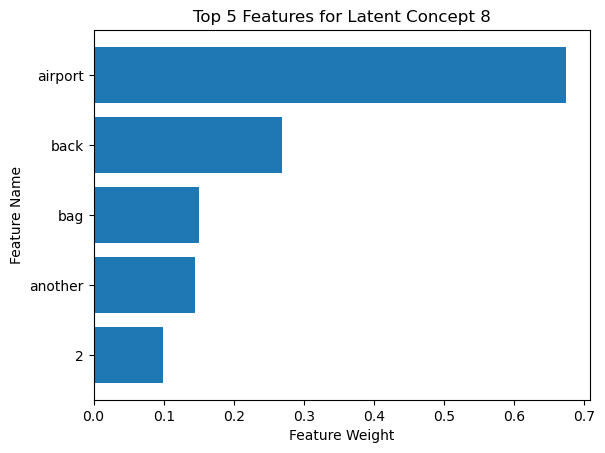

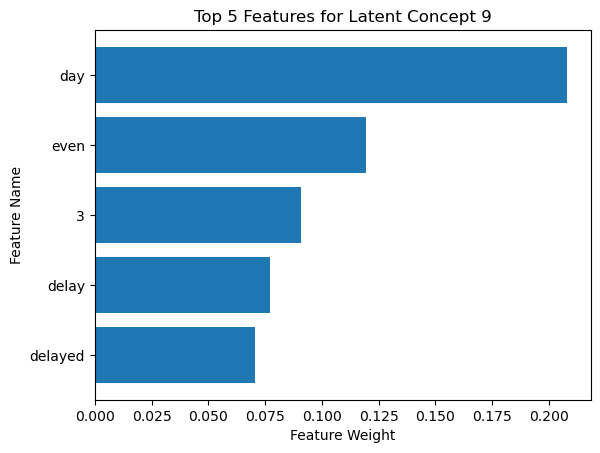

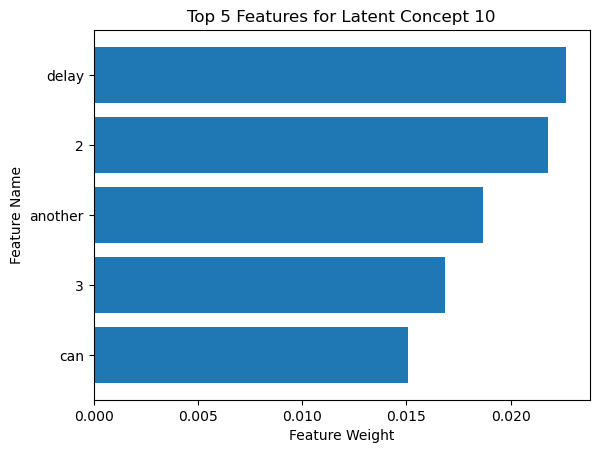

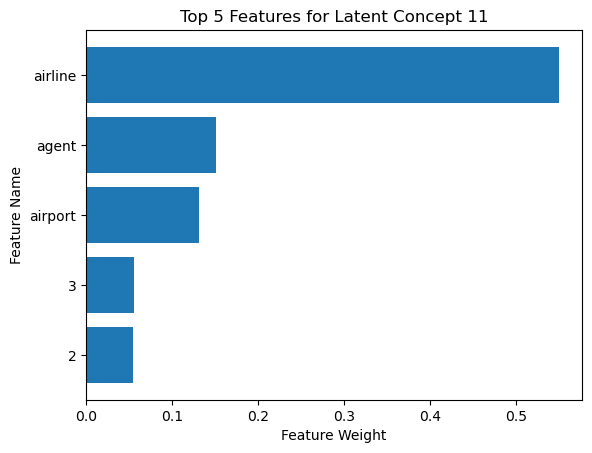

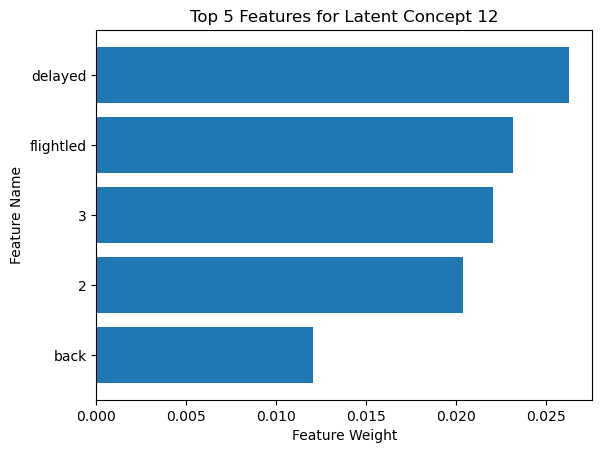

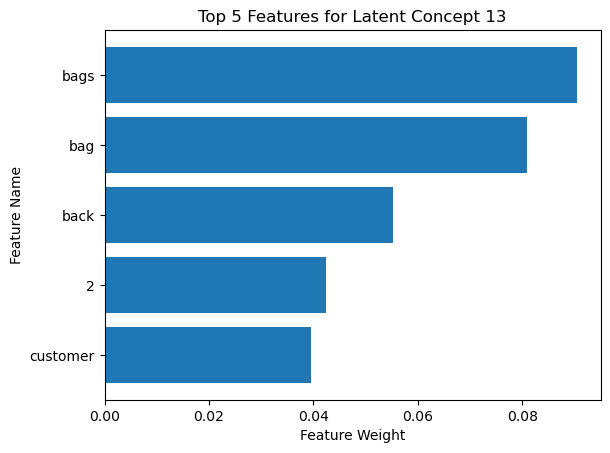

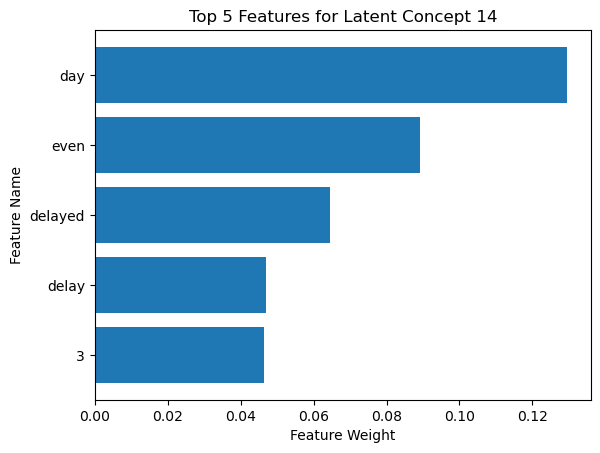

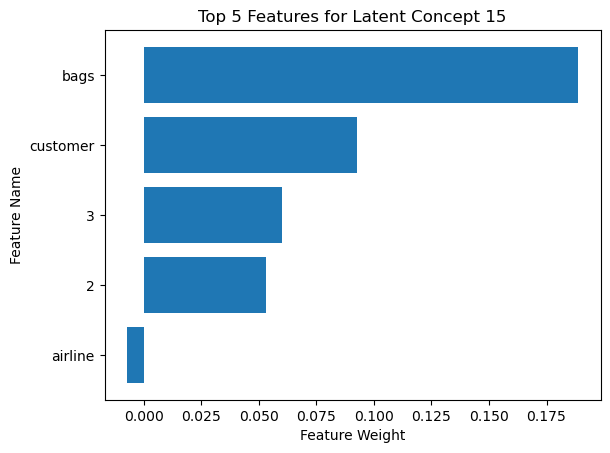

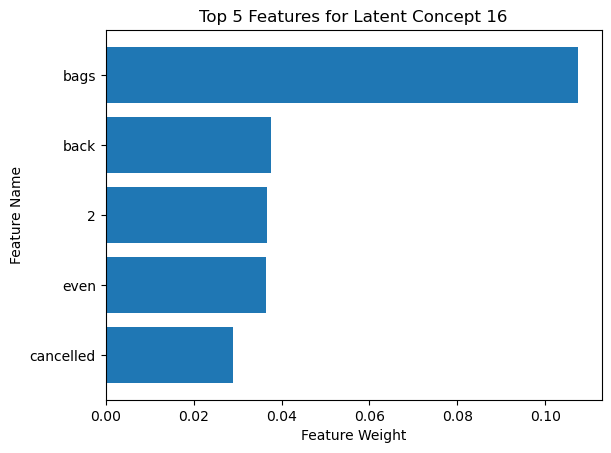

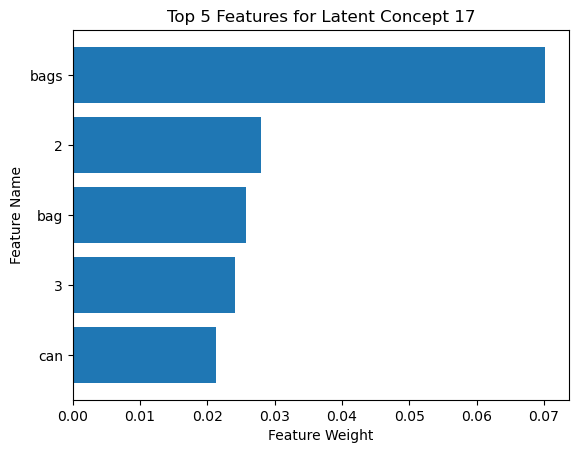

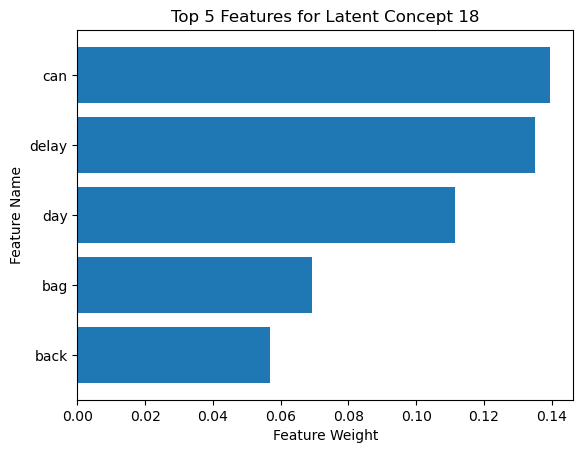

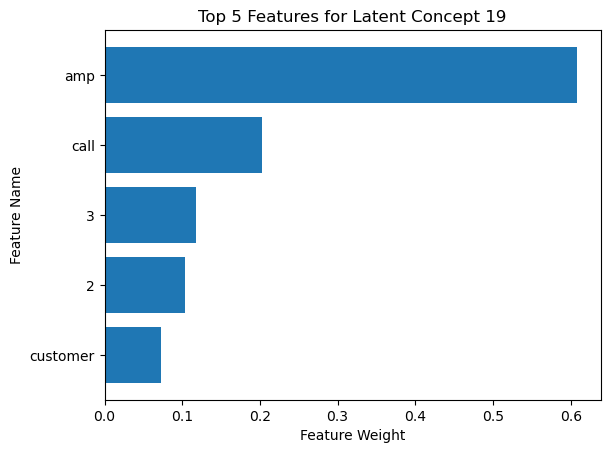

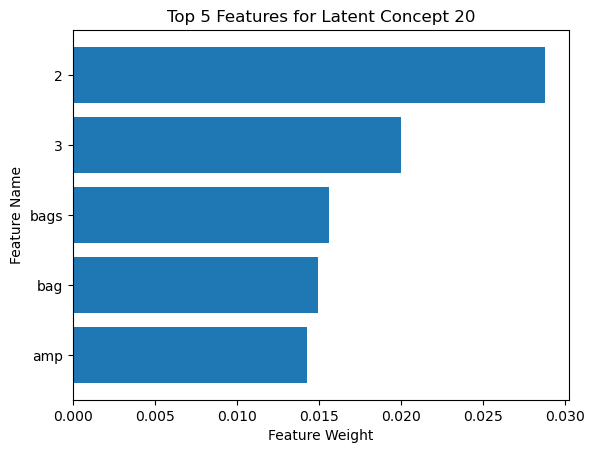

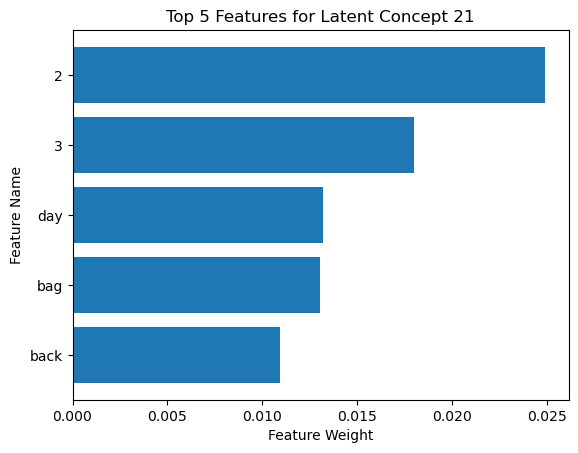

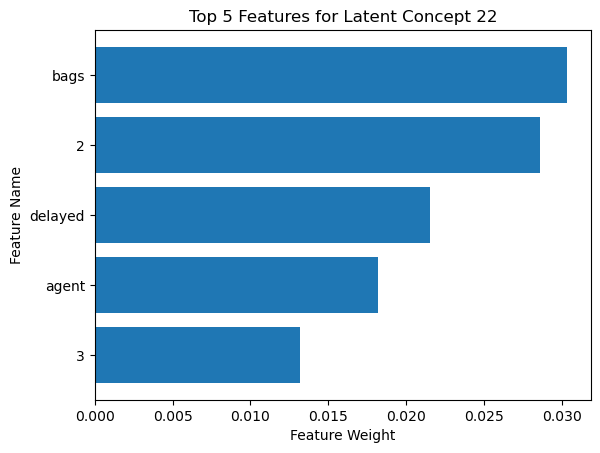

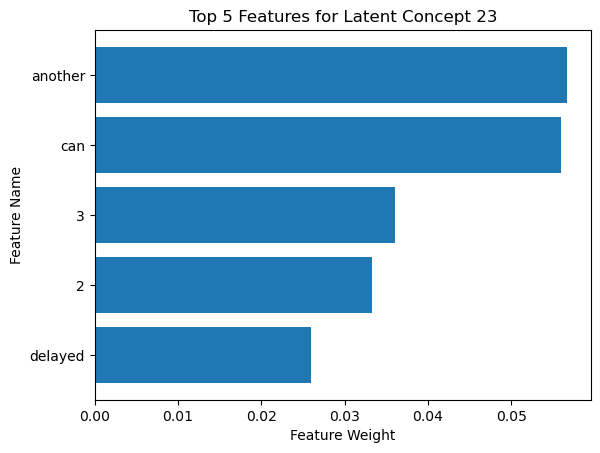

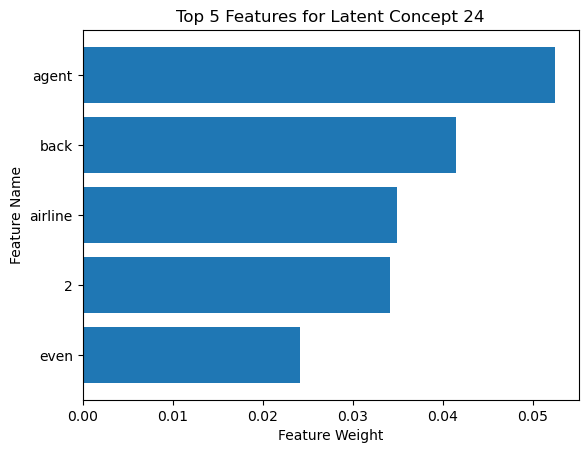

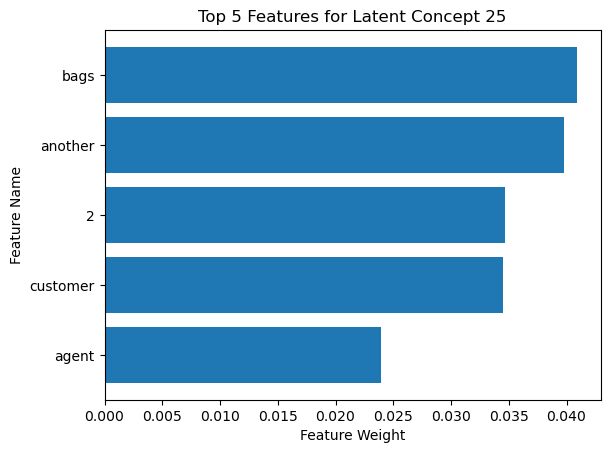

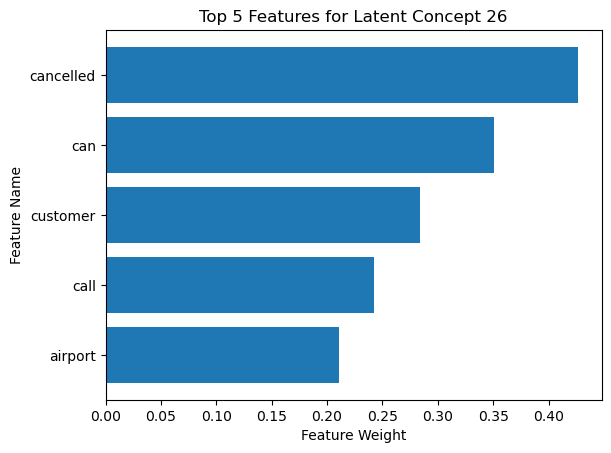

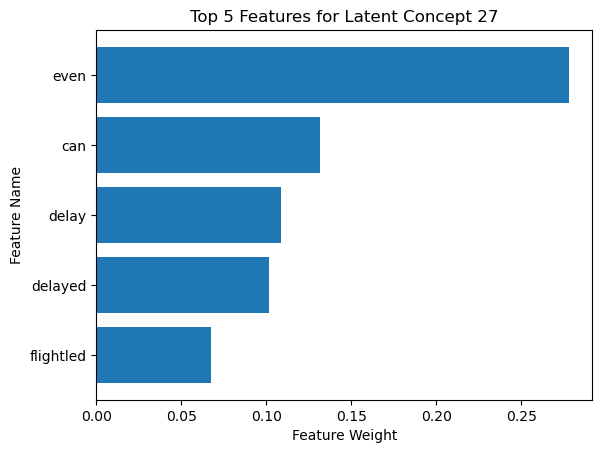

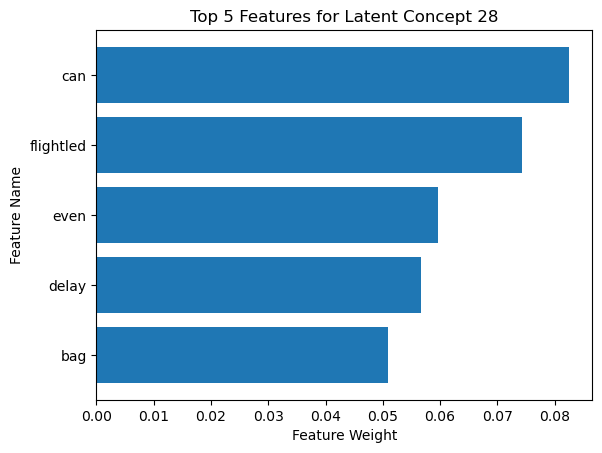

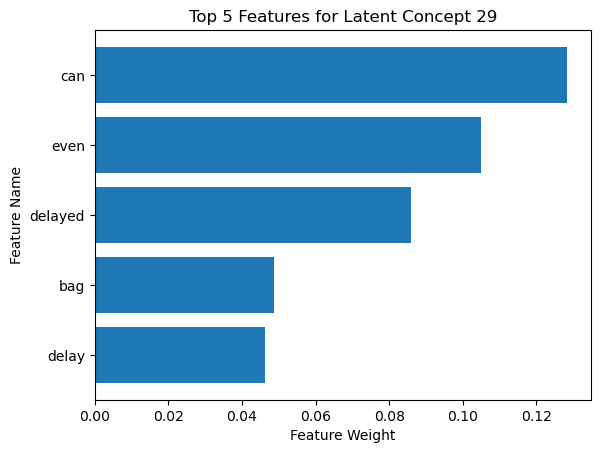

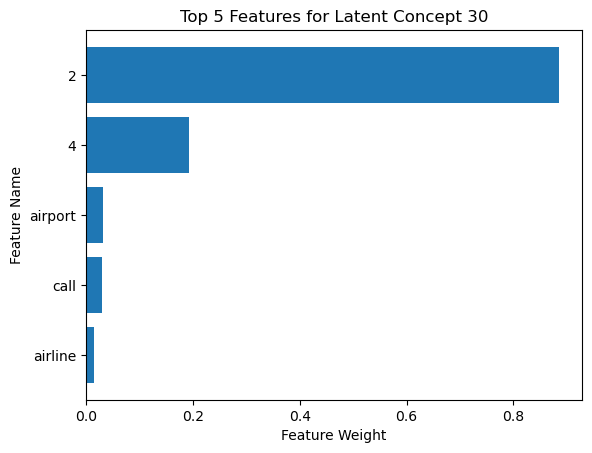

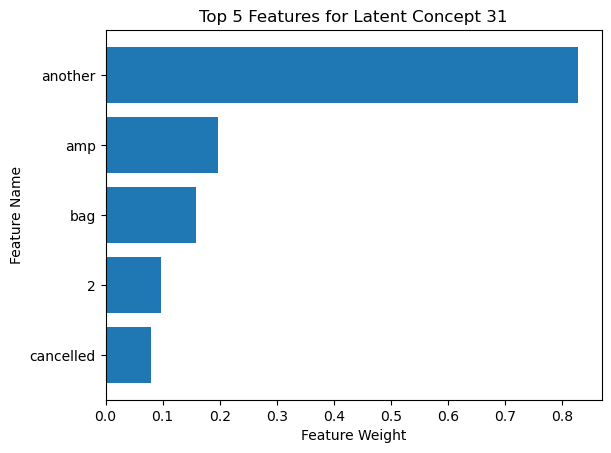

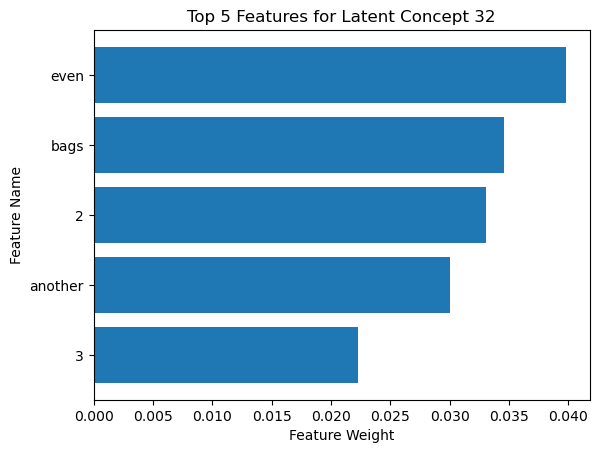

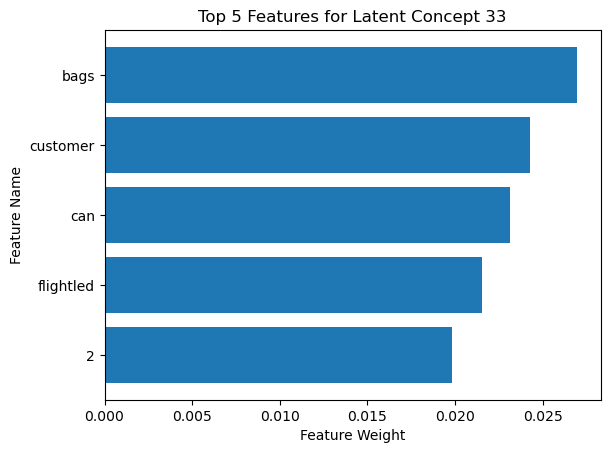

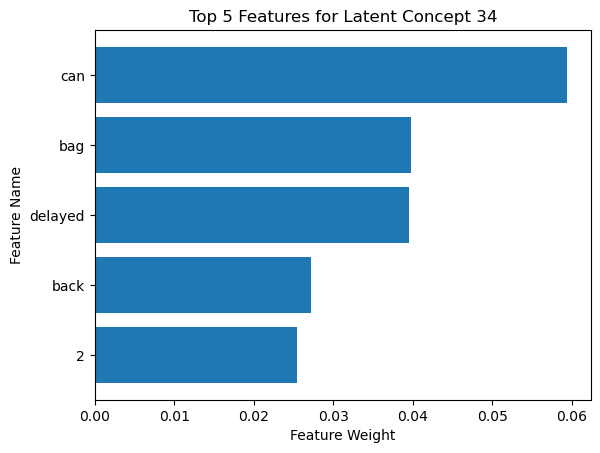

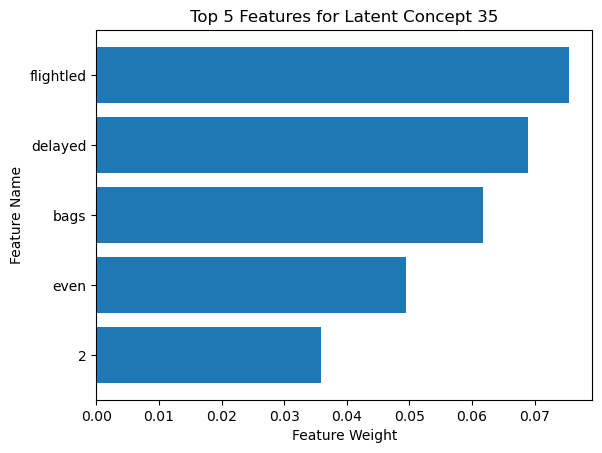

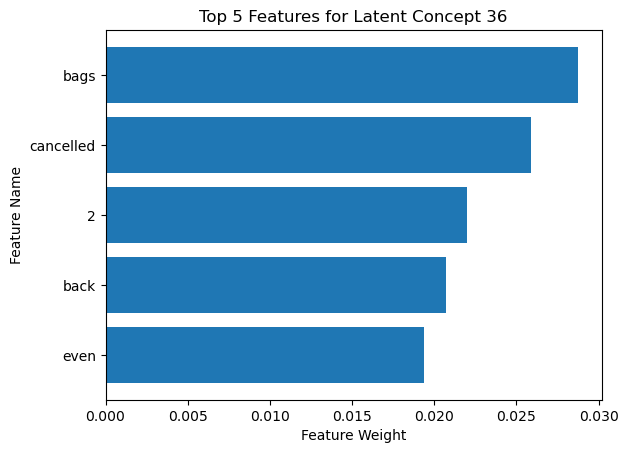

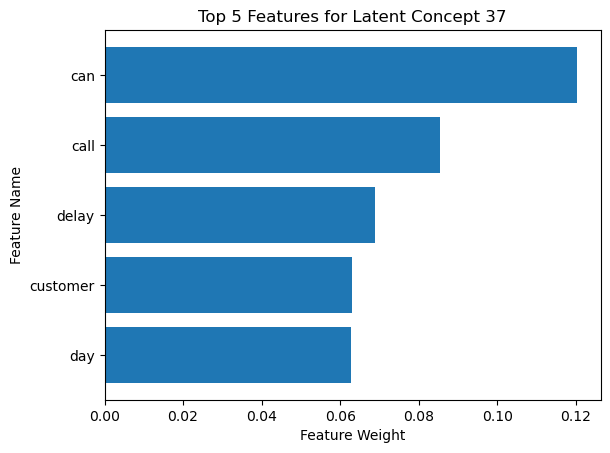

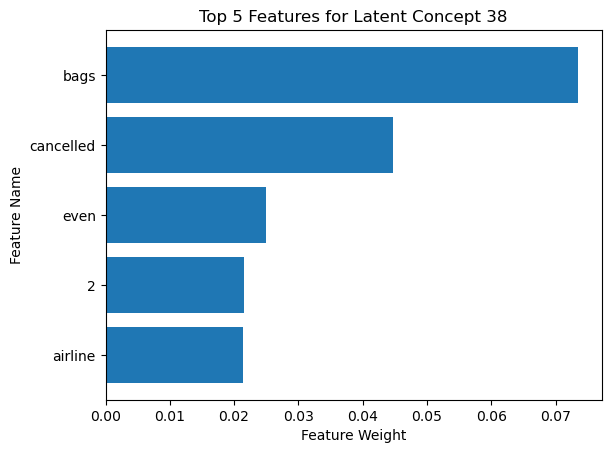

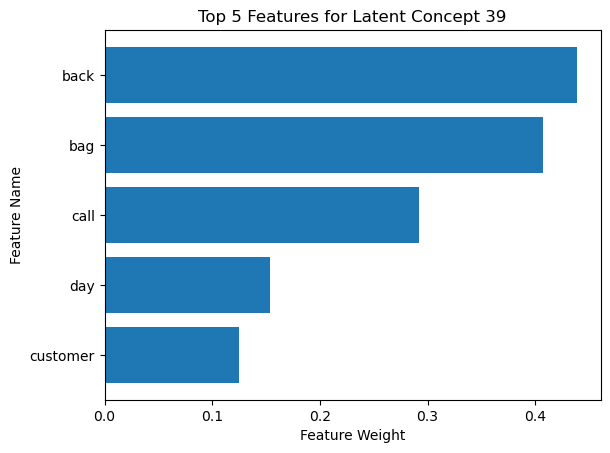

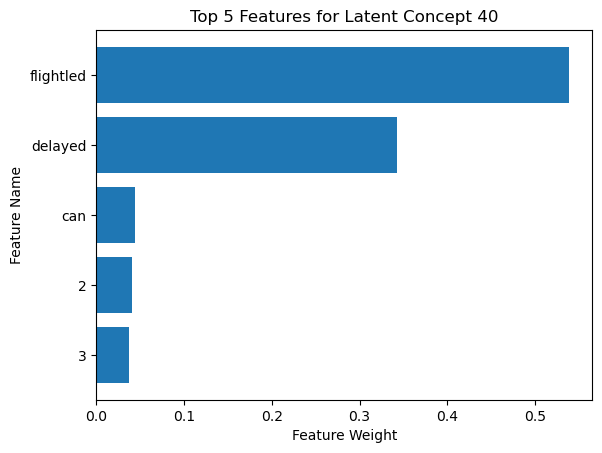

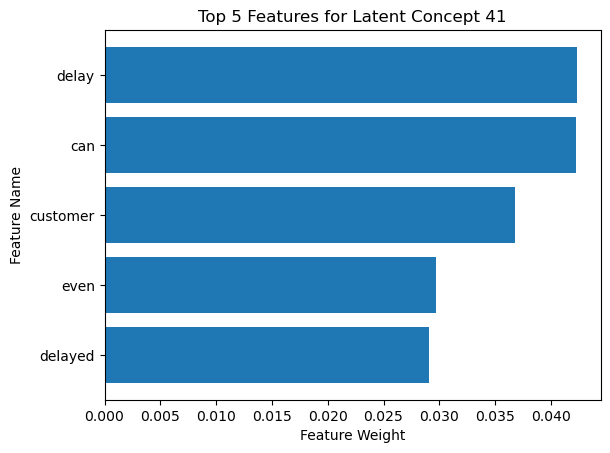

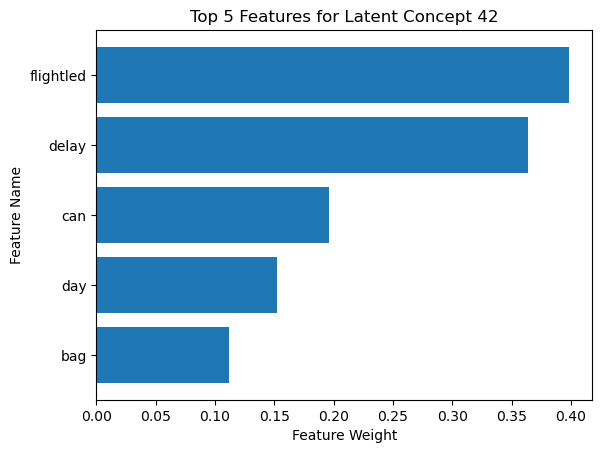

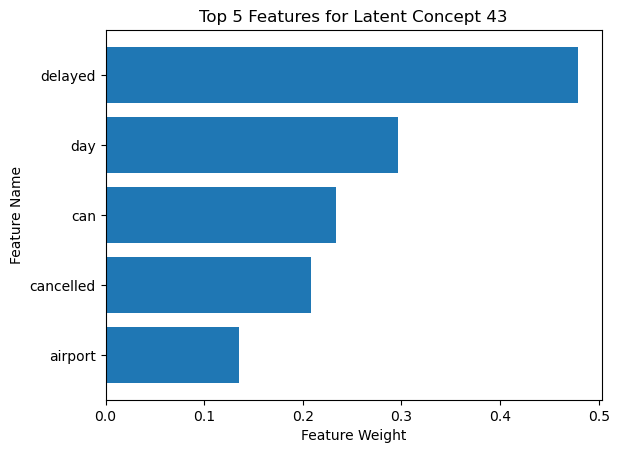

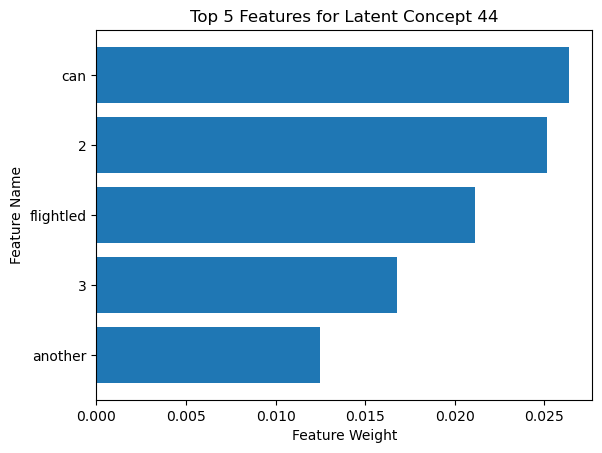

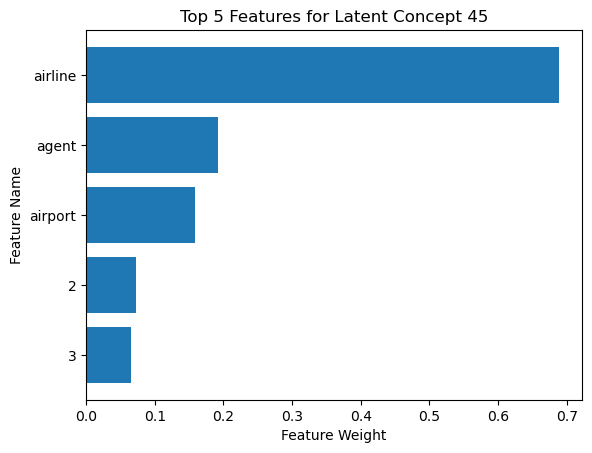

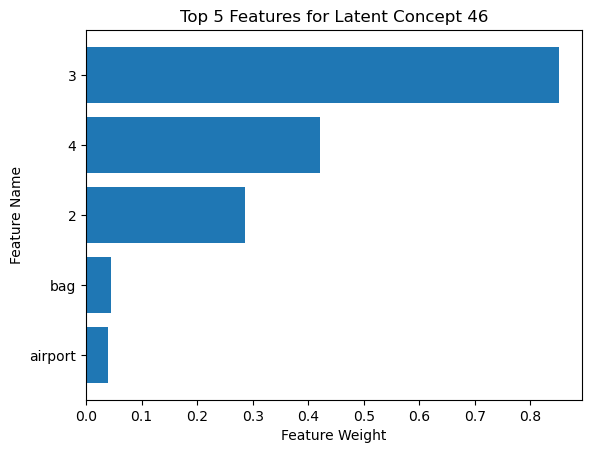

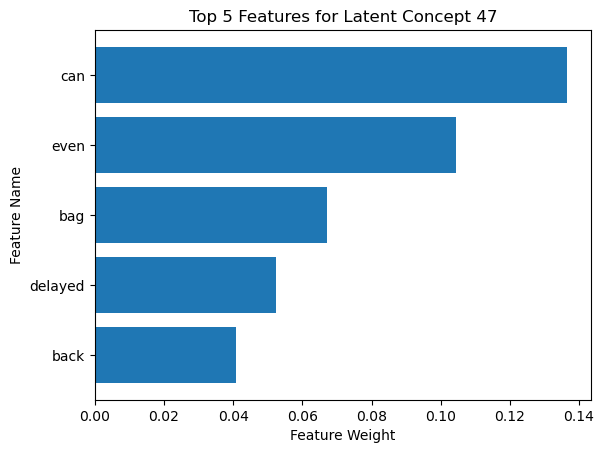

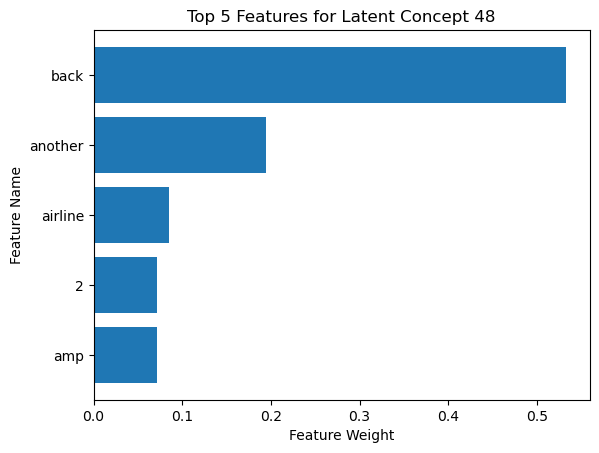

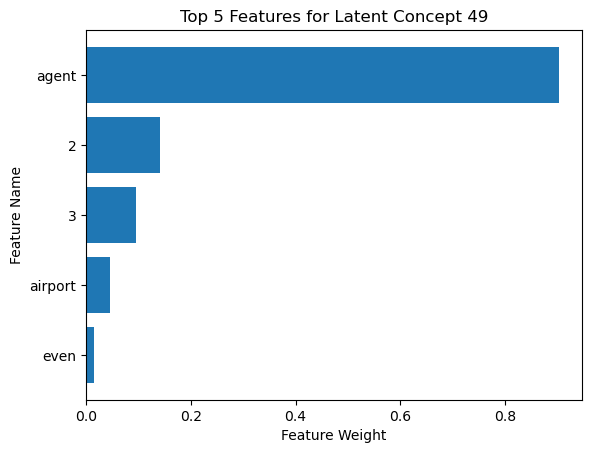

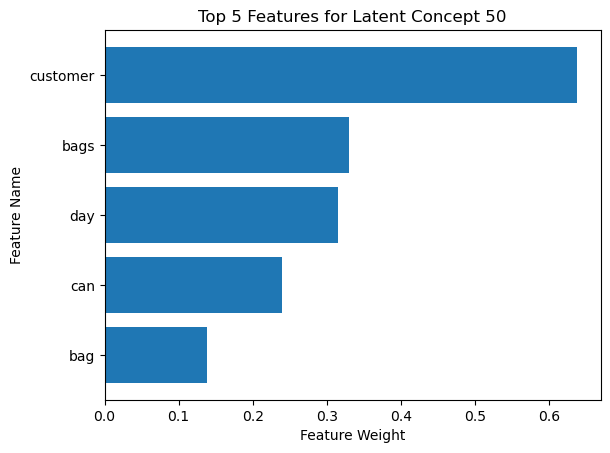

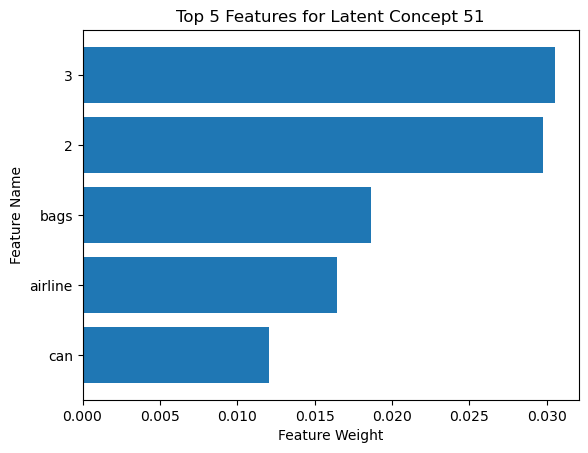

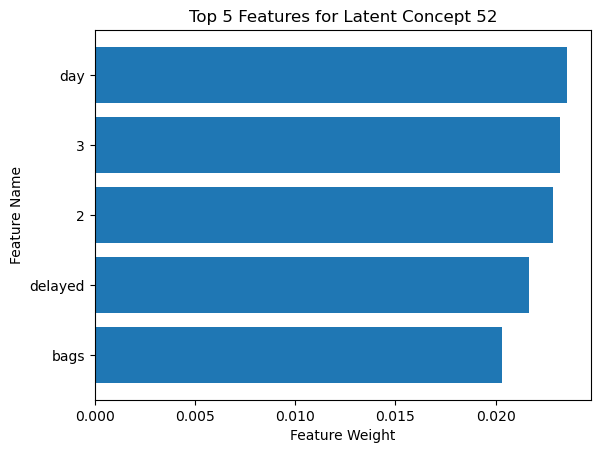

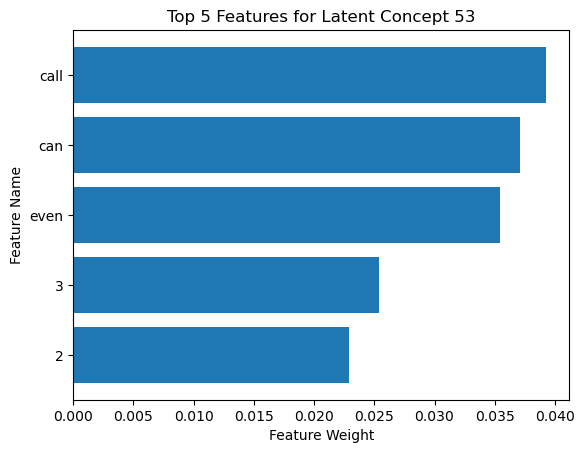

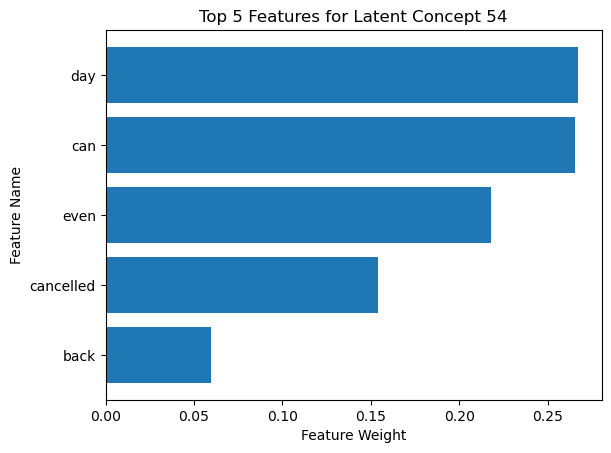

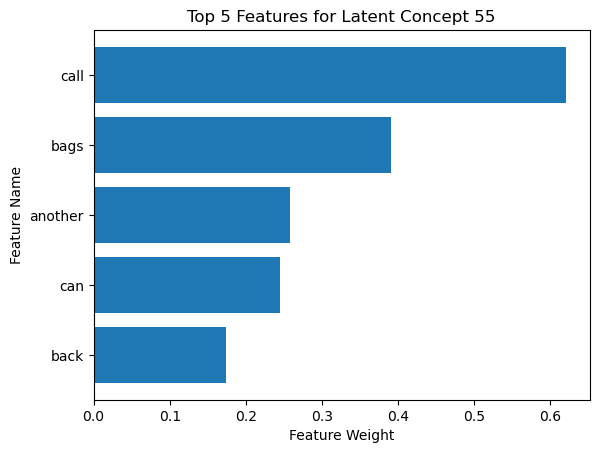

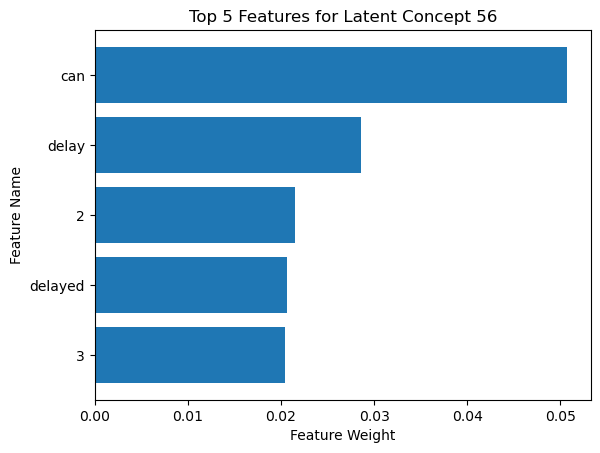

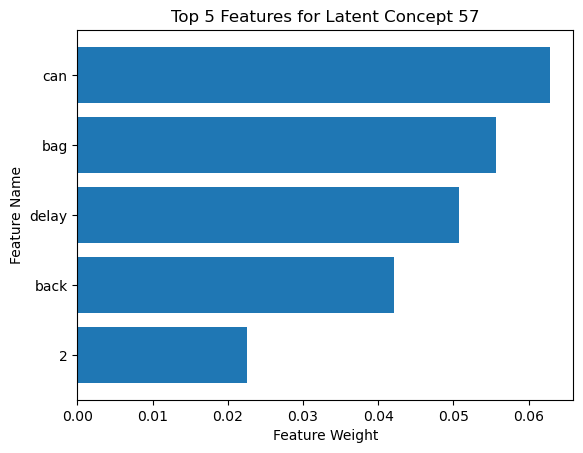

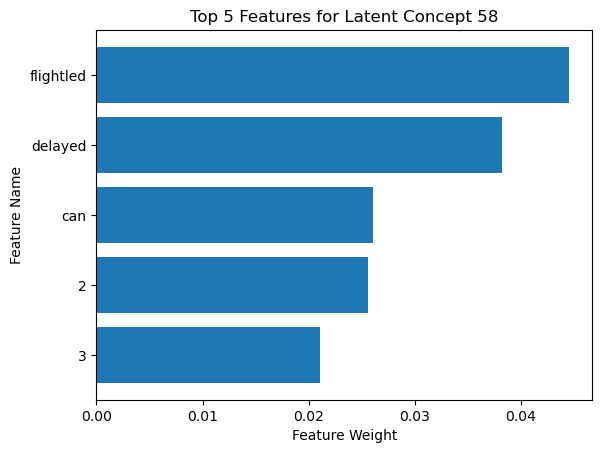

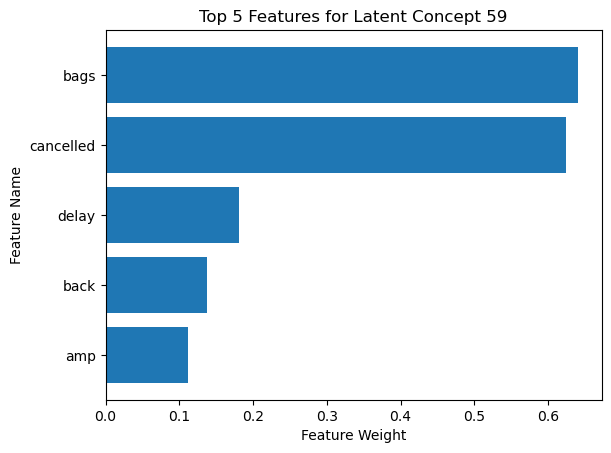

In [64]:
num_features = 5
for i in range(V_T.shape[1]):
    plt.barh(tfidf_train_df.columns[np.argsort(V_T[:, i])[-num_features:]], 
             V_T[np.argsort(V_T[:, i])[-num_features:], i])
    plt.title(f'Top {num_features} Features for Latent Concept {i}')
    plt.xlabel('Feature Weight')
    plt.ylabel('Feature Name')
    plt.show()

In [65]:
from sklearn.metrics import confusion_matrix

X_lsa = lsa_obj.fit_transform(tfidf_train_df)

y = tweets_binary_df['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_lsa, y, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
accuracy_binary = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_binary)

confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.859370488016171
Confusion Matrix:
[[2703   68]
 [ 419  273]]


### Movie dataset

In [66]:
movie_df = pd.read_csv(r"C:\Users\Иван\Downloads\movies_dataset.csv")

In [67]:
tokenized_data_movie = movie_df["tokenized_text"]
doc_data_movie = [' '.join(data) for data in tokenized_data_movie]

In [68]:
stop_words = get_stop_words('english') + ['arent', 'cant', 'couldnt', 'd', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'heres', 'hes', 'hows', 'id', 'ill', 'im', 'isnt', 'ive', 'lets', 'll', 'm', 'mustnt', 'nt', 're', 's', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'thats', 'theres', 'theyd', 'theyll', 'theyre', 'theyve', 've', 'wasnt', 'wed', 'well', 'werent', 'weve', 'whats', 'whens', 'wheres', 'whos', 'whys', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve']
tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words=stop_words, 
                        tokenizer=parse_data, 
                        max_df=0.2,
                        min_df=0.02,
                        token_pattern=None
                       )
tfidf_train_sparse = tfidf.fit_transform(doc_data_movie)

tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), columns=tfidf.get_feature_names_out())

In [69]:
movie_obj = OurTruncatedSVD(n_components=20, n_iter=10, random_state=42)
tfidf_movie_data = movie_obj.fit_transform(tfidf_train_df)
Sigma = movie_obj.singular_values_
V_T = movie_obj.components_.T

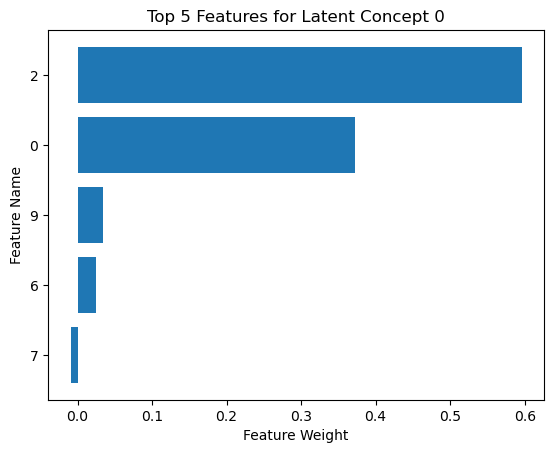

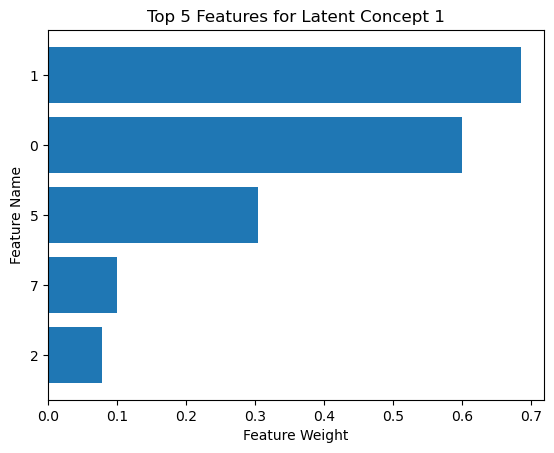

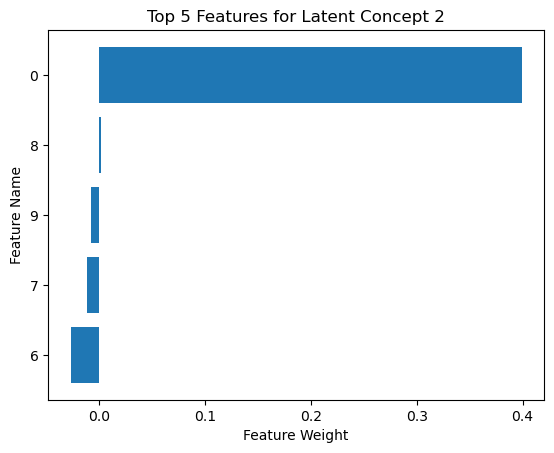

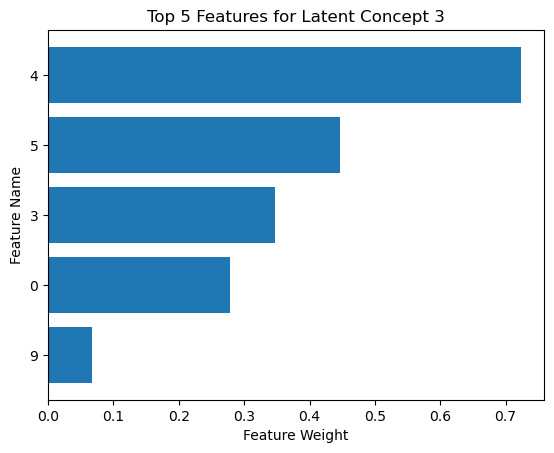

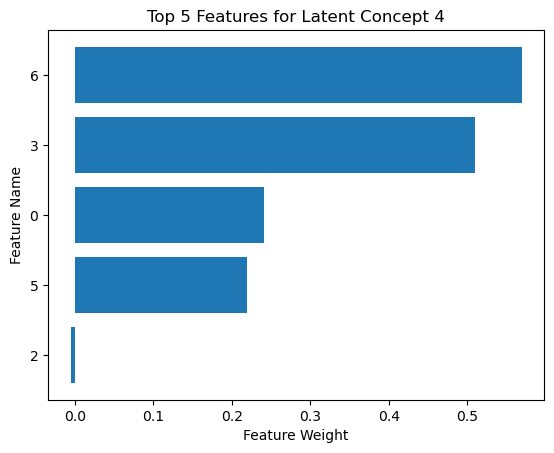

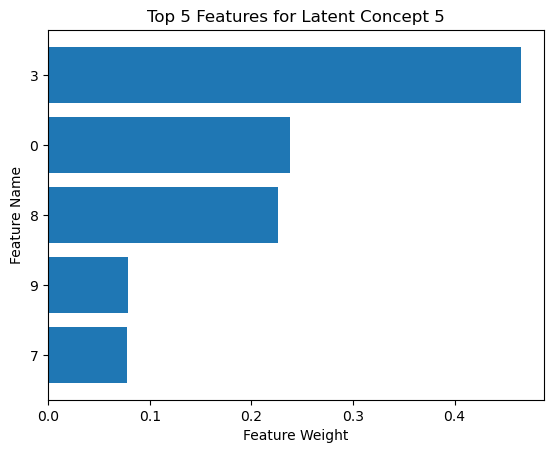

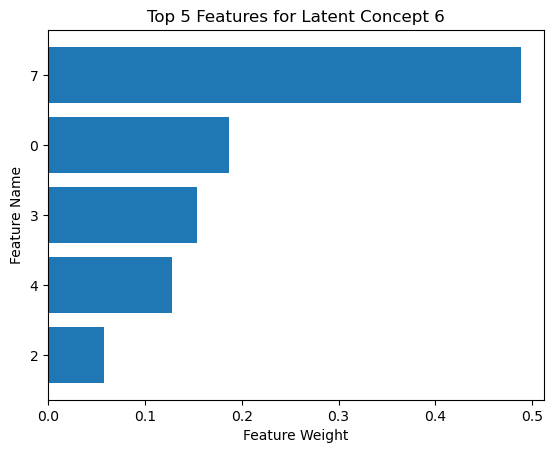

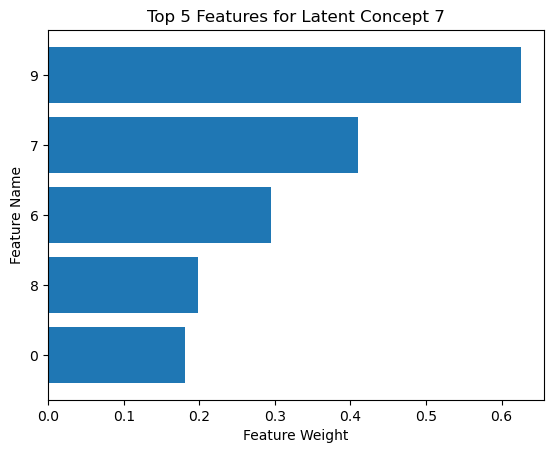

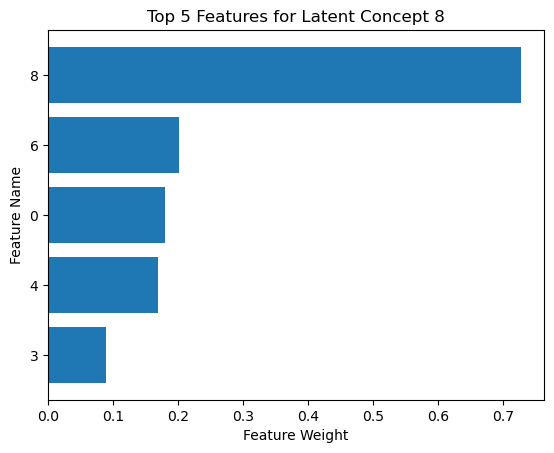

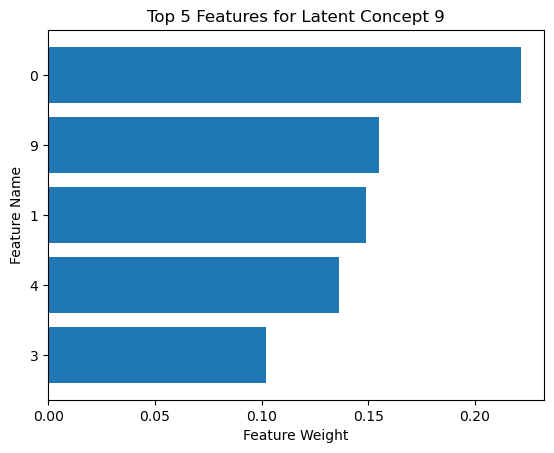

In [70]:
num_features = 5
for i in range(V_T.shape[1]):
    plt.barh(tfidf_train_df.columns[np.argsort(V_T[:, i])[-num_features:]], 
             V_T[np.argsort(V_T[:, i])[-num_features:], i])
    plt.title(f'Top {num_features} Features for Latent Concept {i}')
    plt.xlabel('Feature Weight')
    plt.ylabel('Feature Name')
    plt.show()

In [71]:
movie_df['genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [72]:
X_movie = movie_obj.fit_transform(tfidf_train_df)

y = movie_df['genre']
X_train, X_test, y_train, y_test = train_test_split(X_movie, y, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
accuracy_genre = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_genre)

Accuracy: 0.41009743135518156


C:\anac\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


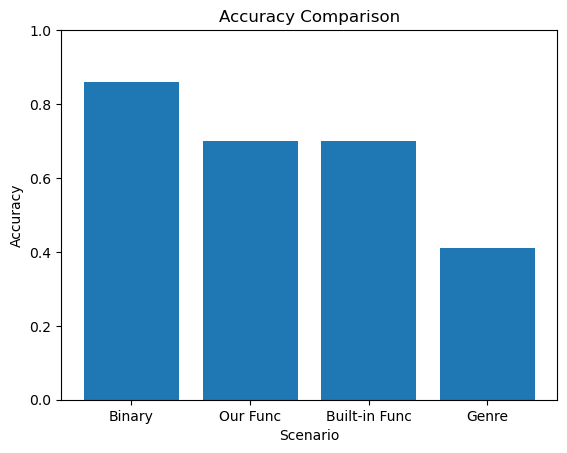

In [106]:
import matplotlib.pyplot as plt

# Define the accuracies for each scenario
accuracies = [accuracy_binary, accuracy_multi, accuracy_built, accuracy_genre]

# Define the labels for each scenario
labels = ['Binary', 'Our Func', 'Built-in Func','Genre']

# Plot the accuracies
plt.bar(labels, accuracies)
plt.ylim(0, 1)  # Set the y-axis limits
plt.xlabel('Scenario')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


## Subsequent actions

Given that sentiment analysis models are not perfect, our research aims to concentrate on Latent Semantic Analysis (LSA) and its application in topic modeling and keyword extraction. Through this, we aim to compare its effectiveness with other established methodologies in the field. Our investigation seeks to identify the strengths and weaknesses of LSA in relation to these other approaches, with the ultimate goal of improving sentiment analysis accuracy.